# TRANSPORTATION SECTOR CONSUMPTION FORECASTING 

### Loading the Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.layers import TimeDistributed, Flatten
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, Flatten
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.layers import TimeDistributed, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, TimeDistributed
from statsmodels.tsa.arima.model import ARIMA
from keras.layers import Input
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

### Read and load the dataset

In [2]:
Transportation_new = pd.read_excel('use_tot_sector.xlsx',sheet_name='Transportation Sector', header=1, index_col=0)

In [3]:
# Reset column names to the first row (State/Year) and skip the last row (US)
Transportation_new.columns = Transportation_new.iloc[0]
Transportation = Transportation_new[1:-1]
print(Transportation)

State     1960     1961     1962     1963     1964     1965     1966     1967  \
AK       27139    31895    34182    32387    32246    34379    36233    43862   
AL      176015   172023   179802   189395   190545   200727   206854   216031   
AR      104652   114214   116715   123586   130214   129593   136348   139183   
AZ      116689   121239   129736   136740   143720   139441   148689   159735   
CA     1224448  1292718  1316805  1354256  1421236  1491493  1592738  1654402   
CO      104450   114878   122860   129258   133723   138618   147575   154378   
CT      116898   125496   130768   134750   137397   140533   150121   155282   
DC       28823    29581    29525    29602    31091    33820    33780    32459   
DE       43735    44020    41960    42957    43653    43432    44193    45334   
FL      348001   358850   407087   415833   432389   456712   473137   495399   
GA      208600   208150   225398   239176   249133   257459   282715   317508   
HI       61778    74032    6

### Load the state abbrevation and divide the years to 6 decades.

In [4]:
# Define the state abbreviation dictionary
state_dict = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

# Select the columns for both time periods
Transportation_1960_1970 = Transportation.loc[:, '1960':'1970']
Transportation_1970_1980 = Transportation.loc[:, '1971':'1980']
Transportation_1980_1990 = Transportation.loc[:, '1981':'1990']
Transportation_1990_2000 = Transportation.loc[:, '1991':'2000']
Transportation_2000_2010 = Transportation.loc[:, '2001':'2010']
Transportation_2010_2020 = Transportation.loc[:, '2011':'2020']

# Calculate the average for each state over the specified years
average_1960_1970 = Transportation_1960_1970.mean(axis=1)
average_1970_1980 = Transportation_1970_1980.mean(axis=1)
average_1980_1990 = Transportation_1980_1990.mean(axis=1)
average_1990_2000 = Transportation_1990_2000.mean(axis=1)
average_2000_2010 = Transportation_2000_2010.mean(axis=1)
average_2010_2020 = Transportation_2010_2020.mean(axis=1)


### Print all states with its average for every 10 years for 6 decades

In [5]:
# Iterate through each time interval
time_intervals = [average_1960_1970, average_1970_1980, average_1980_1990, average_1990_2000, average_2000_2010, average_2010_2020]

for i, average_values in enumerate(time_intervals):
    states = []  # List to store full state names
    state_values = []  # List to store state values

    for state in average_values.index:
        # Check if the state abbreviation exists in the dictionary
        if state in state_dict:
            full_state_name = state_dict[state]
            state_value = average_values[state]
            states.append(full_state_name)
            state_values.append(state_value)

    print(f"\nStates from {1960 + i * 10} to {1970 + i * 10}:")
    for j, state in enumerate(states):
        # Round the state value to a specific number of decimal places 
        rounded_value = round(state_values[j], 2)
        print(f"State: {state} - Value: {rounded_value}")


States from 1960 to 1970:
State: Alaska - Value: 41127.55
State: Alabama - Value: 208914.55
State: Arkansas - Value: 134060.0
State: Arizona - Value: 151514.0
State: California - Value: 1526365.82
State: Colorado - Value: 145084.0
State: Connecticut - Value: 146994.27
State: District of Columbia - Value: 31555.27
State: Delaware - Value: 45817.82
State: Florida - Value: 466095.82
State: Georgia - Value: 283505.55
State: Hawaii - Value: 90393.64
State: Iowa - Value: 173015.91
State: Idaho - Value: 50712.82
State: Illinois - Value: 622245.64
State: Indiana - Value: 309159.55
State: Kansas - Value: 203374.91
State: Kentucky - Value: 199884.36
State: Louisiana - Value: 311294.64
State: Massachusetts - Value: 274484.0
State: Maryland - Value: 218101.55
State: Maine - Value: 74311.36
State: Michigan - Value: 484663.0
State: Minnesota - Value: 215632.91
State: Missouri - Value: 310229.91
State: Mississippi - Value: 167543.27
State: Montana - Value: 60830.18
State: North Carolina - Value: 289

### Average for 1960 to 1970 and dividing it into 5 clusters

In [6]:
# Combine the average values for 1960-1970
average_values = pd.concat([average_1960_1970], axis=--1)
average_values.columns = ['1960-1970']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='1960-1970')

# Round off the values to 2 decimal places 
average_values['1960-1970'] = average_values['1960-1970'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['1960-1970'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='1960-1970')  
    cluster_min = cluster_states['1960-1970'].min()
    cluster_max = cluster_states['1960-1970'].max()
    for state, value in zip(cluster_states.index, cluster_states['1960-1970']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Transportation_1960_1970.csv', index=True)



States in Cluster 0:
State: VT - Value: 22460.18
State: DC - Value: 31555.27
State: NH - Value: 40799.09
State: AK - Value: 41127.55
State: DE - Value: 45817.82
State: WY - Value: 47107.27
State: SD - Value: 47400.0
State: ND - Value: 49293.18
State: ID - Value: 50712.82
State: RI - Value: 56741.09
State: NV - Value: 58636.55
State: MT - Value: 60830.18
State: UT - Value: 74055.0
State: ME - Value: 74311.36
State: HI - Value: 90393.64
State: WV - Value: 93765.64
State: NE - Value: 112299.36
State: NM - Value: 115326.0
State: AR - Value: 134060.0
State: OR - Value: 141500.18
State: CO - Value: 145084.0
State: CT - Value: 146994.27
State: AZ - Value: 151514.0
State: SC - Value: 156596.18
Cluster 0 Range: 22460.18 - 156596.18

States in Cluster 1:
State: MS - Value: 167543.27
State: IA - Value: 173015.91
State: OK - Value: 188583.27
State: KY - Value: 199884.36
State: KS - Value: 203374.91
State: AL - Value: 208914.55
State: WI - Value: 212842.82
State: MN - Value: 215632.91
State: MD - 

### Mapping using Tablaue

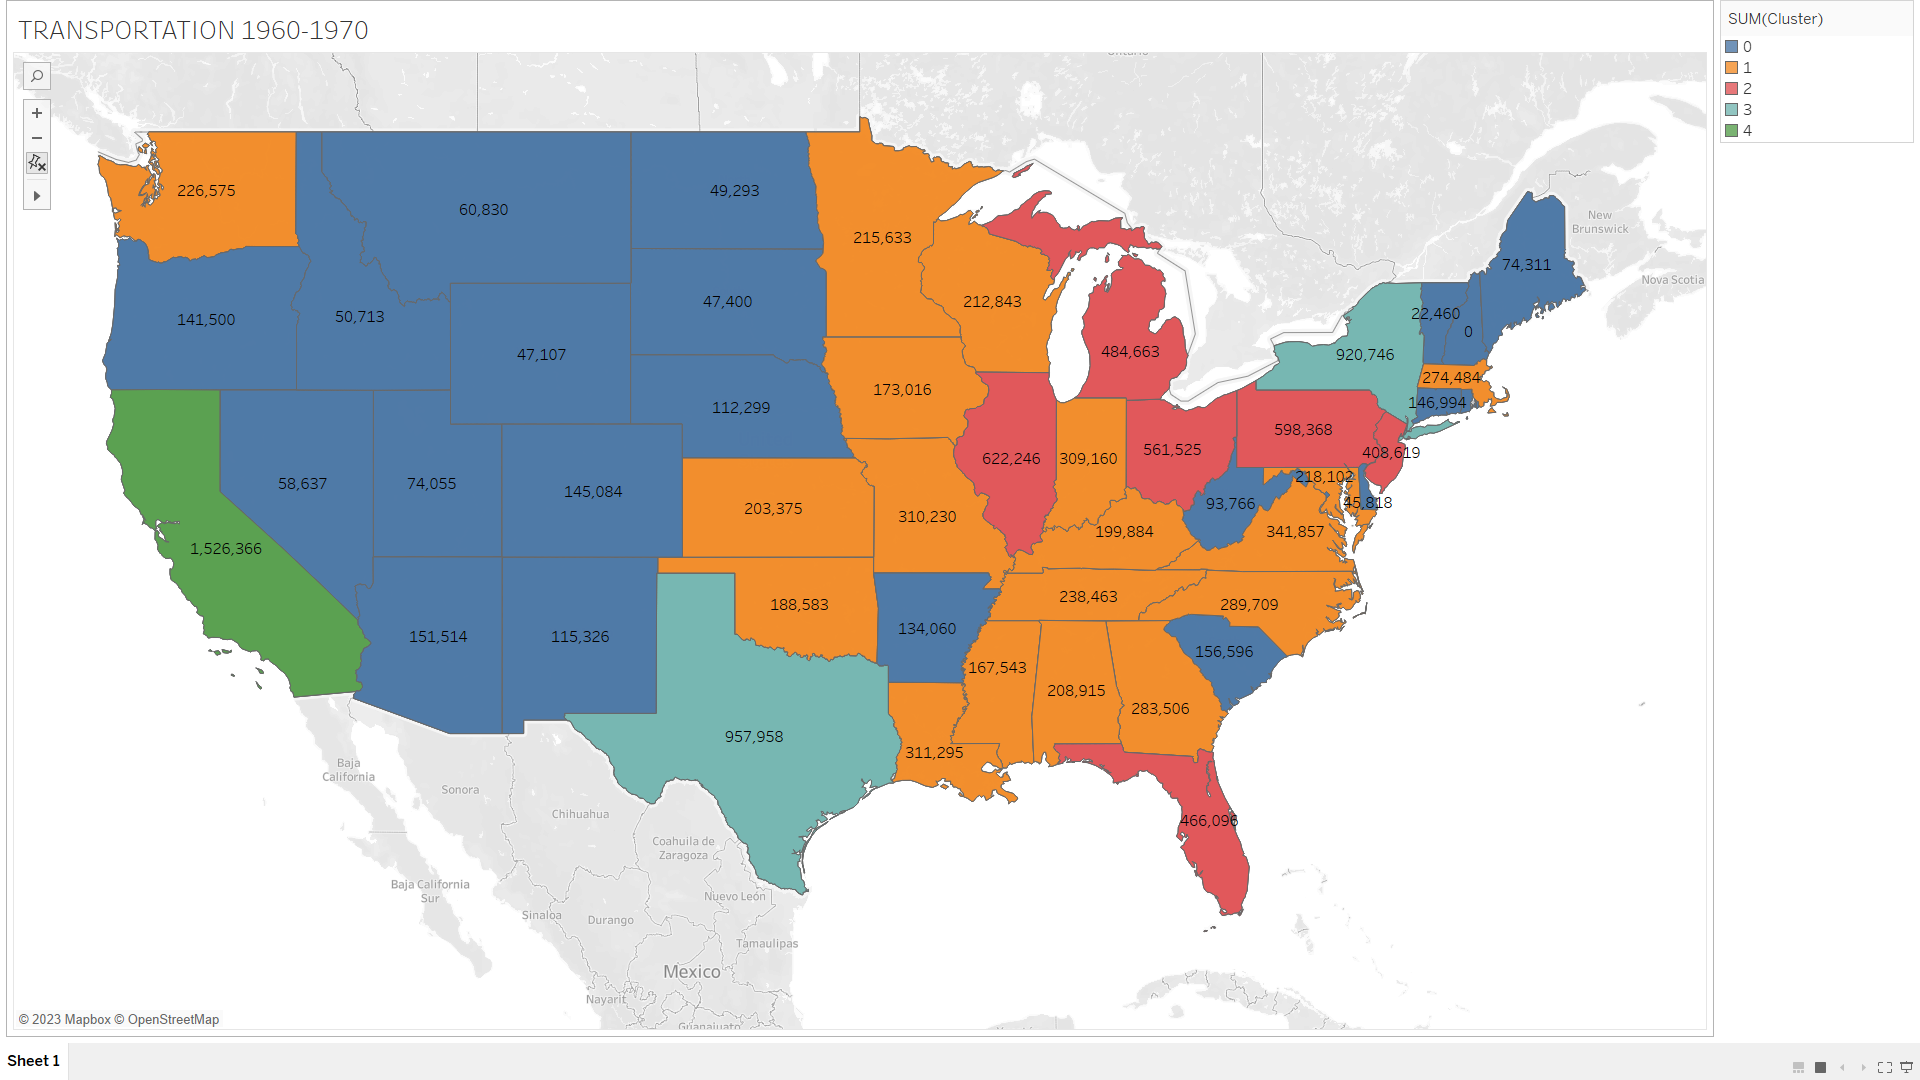

### Average for 1970 to 1980 and dividing it into 5 clusters

In [7]:
# Combine the average values for 1970-1980
average_values = pd.concat([average_1970_1980], axis=1)
average_values.columns = ['1970-1980']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='1970-1980')

# Round off the values to 2 decimal places 
average_values['1970-1980'] = average_values['1970-1980'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['1970-1980'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='1970-1980') 
    cluster_min = cluster_states['1970-1980'].min()
    cluster_max = cluster_states['1970-1980'].max()
    for state, value in zip(cluster_states.index, cluster_states['1970-1980']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Transportation_1970-1980.csv', index=True)



States in Cluster 0:
State: VT - Value: 34552.2
State: DC - Value: 35088.6
State: DE - Value: 54885.2
State: RI - Value: 58024.9
State: NH - Value: 58696.8
State: SD - Value: 64033.7
State: ND - Value: 66018.2
State: WY - Value: 73417.0
State: ID - Value: 82079.0
State: MT - Value: 85088.0
State: AK - Value: 85301.5
State: NV - Value: 96626.6
State: ME - Value: 97300.7
State: UT - Value: 116370.3
State: HI - Value: 139609.8
State: WV - Value: 140507.0
State: NE - Value: 156163.4
State: NM - Value: 163013.5
Cluster 0 Range: 34552.20 - 163013.50

States in Cluster 1:
State: CT - Value: 196589.6
State: AR - Value: 206848.5
State: OR - Value: 228445.0
State: SC - Value: 239504.5
State: AZ - Value: 243222.5
State: CO - Value: 244647.5
State: MS - Value: 245923.2
State: IA - Value: 249646.4
State: KS - Value: 273650.8
State: OK - Value: 288867.3
State: KY - Value: 303439.4
State: MD - Value: 305545.0
State: WI - Value: 324622.6
State: MN - Value: 324929.6
State: AL - Value: 350051.2
Cluster

### Mapping using Tablaue

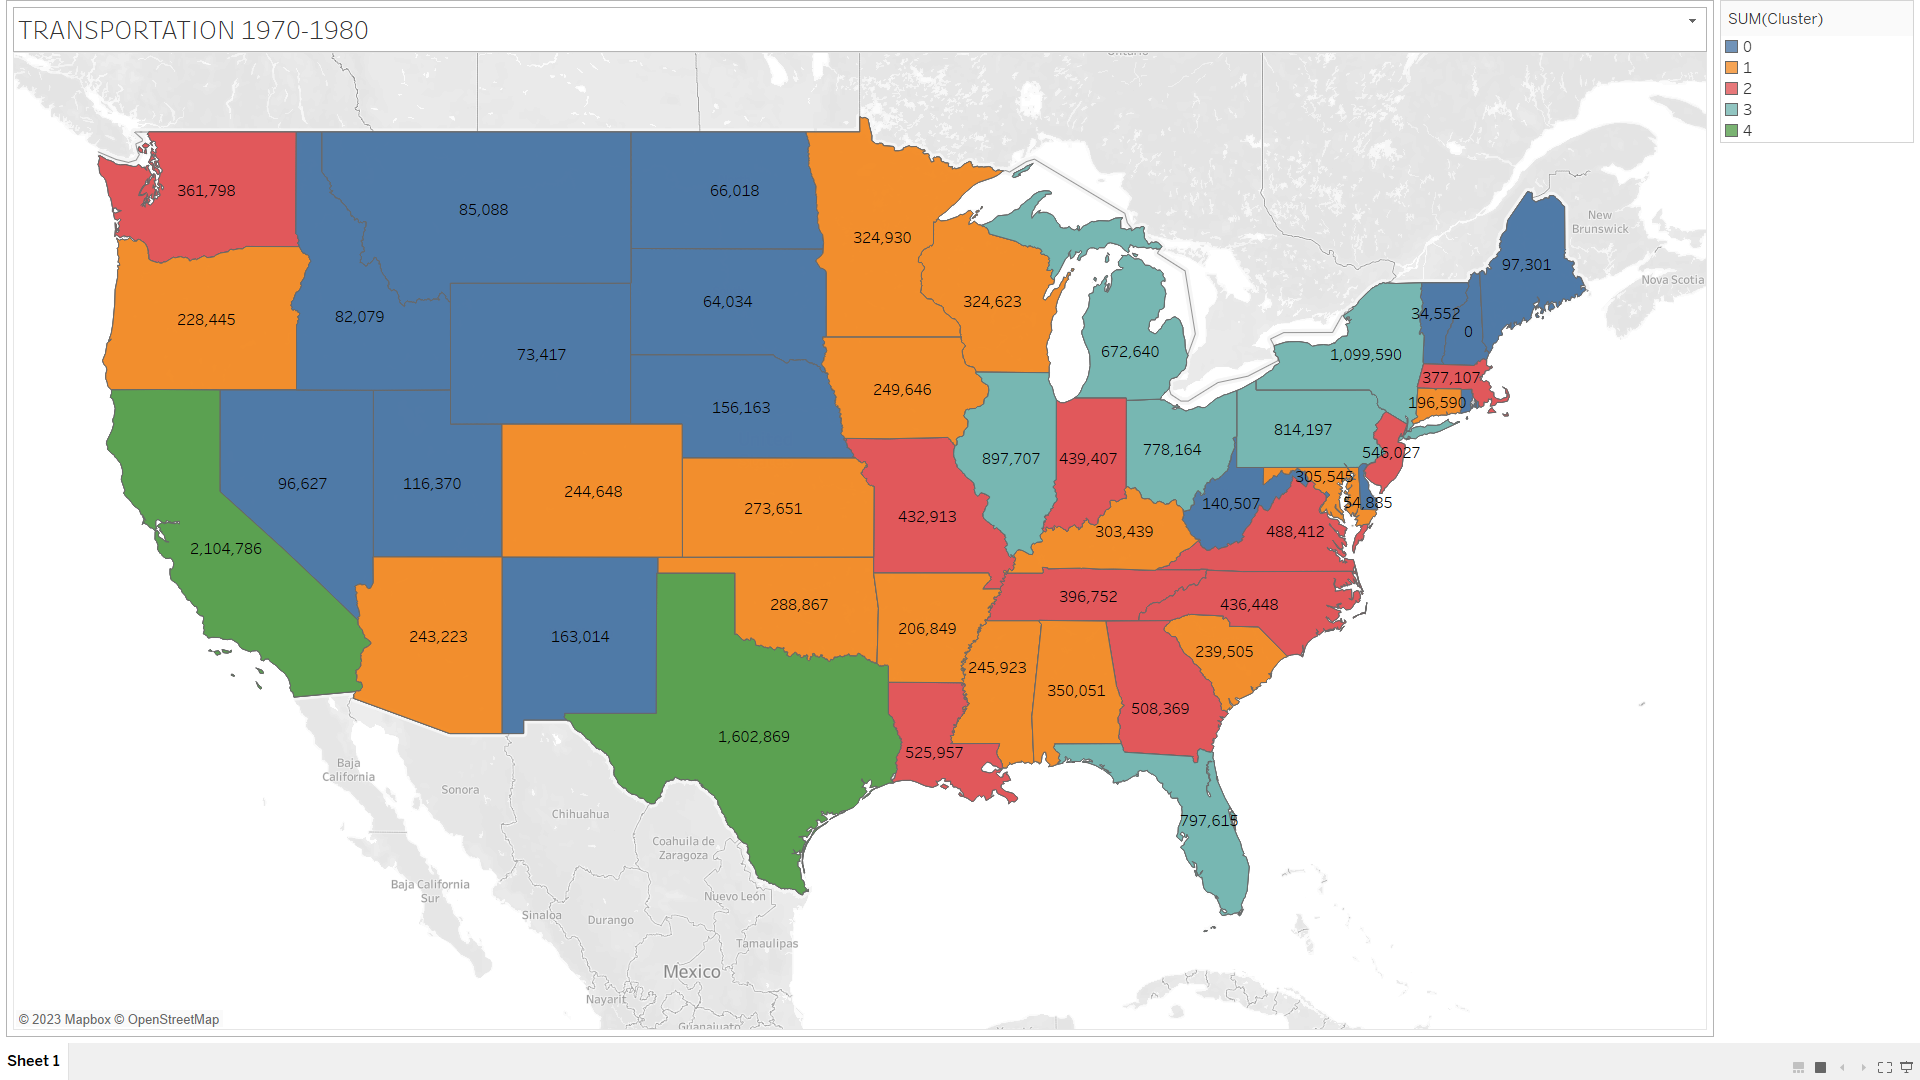

### Average for 1980 to 1990 and dividing it into 5 clusters

In [8]:
# Combine the average values for 1980-1990
average_values = pd.concat([average_1980_1990], axis=1)
average_values.columns = ['1980-1990']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='1980-1990')

# Round off the values to 2 decimal places 
average_values['1980-1990'] = average_values['1980-1990'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['1980-1990'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='1980-1990') 
    cluster_min = cluster_states['1980-1990'].min()
    cluster_max = cluster_states['1980-1990'].max()
    for state, value in zip(cluster_states.index, cluster_states['1980-1990']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Transportation_1980-1990.csv', index=True)



States in Cluster 0:
State: DC - Value: 29822.4
State: VT - Value: 38186.7
State: RI - Value: 55537.9
State: DE - Value: 58941.0
State: SD - Value: 62736.5
State: NH - Value: 66572.8
State: ND - Value: 69008.6
State: WY - Value: 76305.6
State: ID - Value: 81035.9
State: MT - Value: 82483.0
State: ME - Value: 99225.6
State: NV - Value: 120367.5
State: HI - Value: 131760.8
State: UT - Value: 136242.2
State: AK - Value: 139367.3
State: NE - Value: 145011.4
State: WV - Value: 147200.9
State: NM - Value: 180905.3
Cluster 0 Range: 29822.40 - 180905.30

States in Cluster 1:
State: CT - Value: 199624.1
State: AR - Value: 213675.6
State: IA - Value: 229222.7
State: OR - Value: 256431.2
State: CO - Value: 267829.3
State: MS - Value: 269840.8
State: KS - Value: 270439.0
State: SC - Value: 271751.0
State: AZ - Value: 294999.8
State: WI - Value: 320722.7
State: MD - Value: 327559.2
State: MN - Value: 331190.7
State: OK - Value: 340127.0
State: KY - Value: 350897.7
State: AL - Value: 357343.9
State

### Mapping using Tablaue

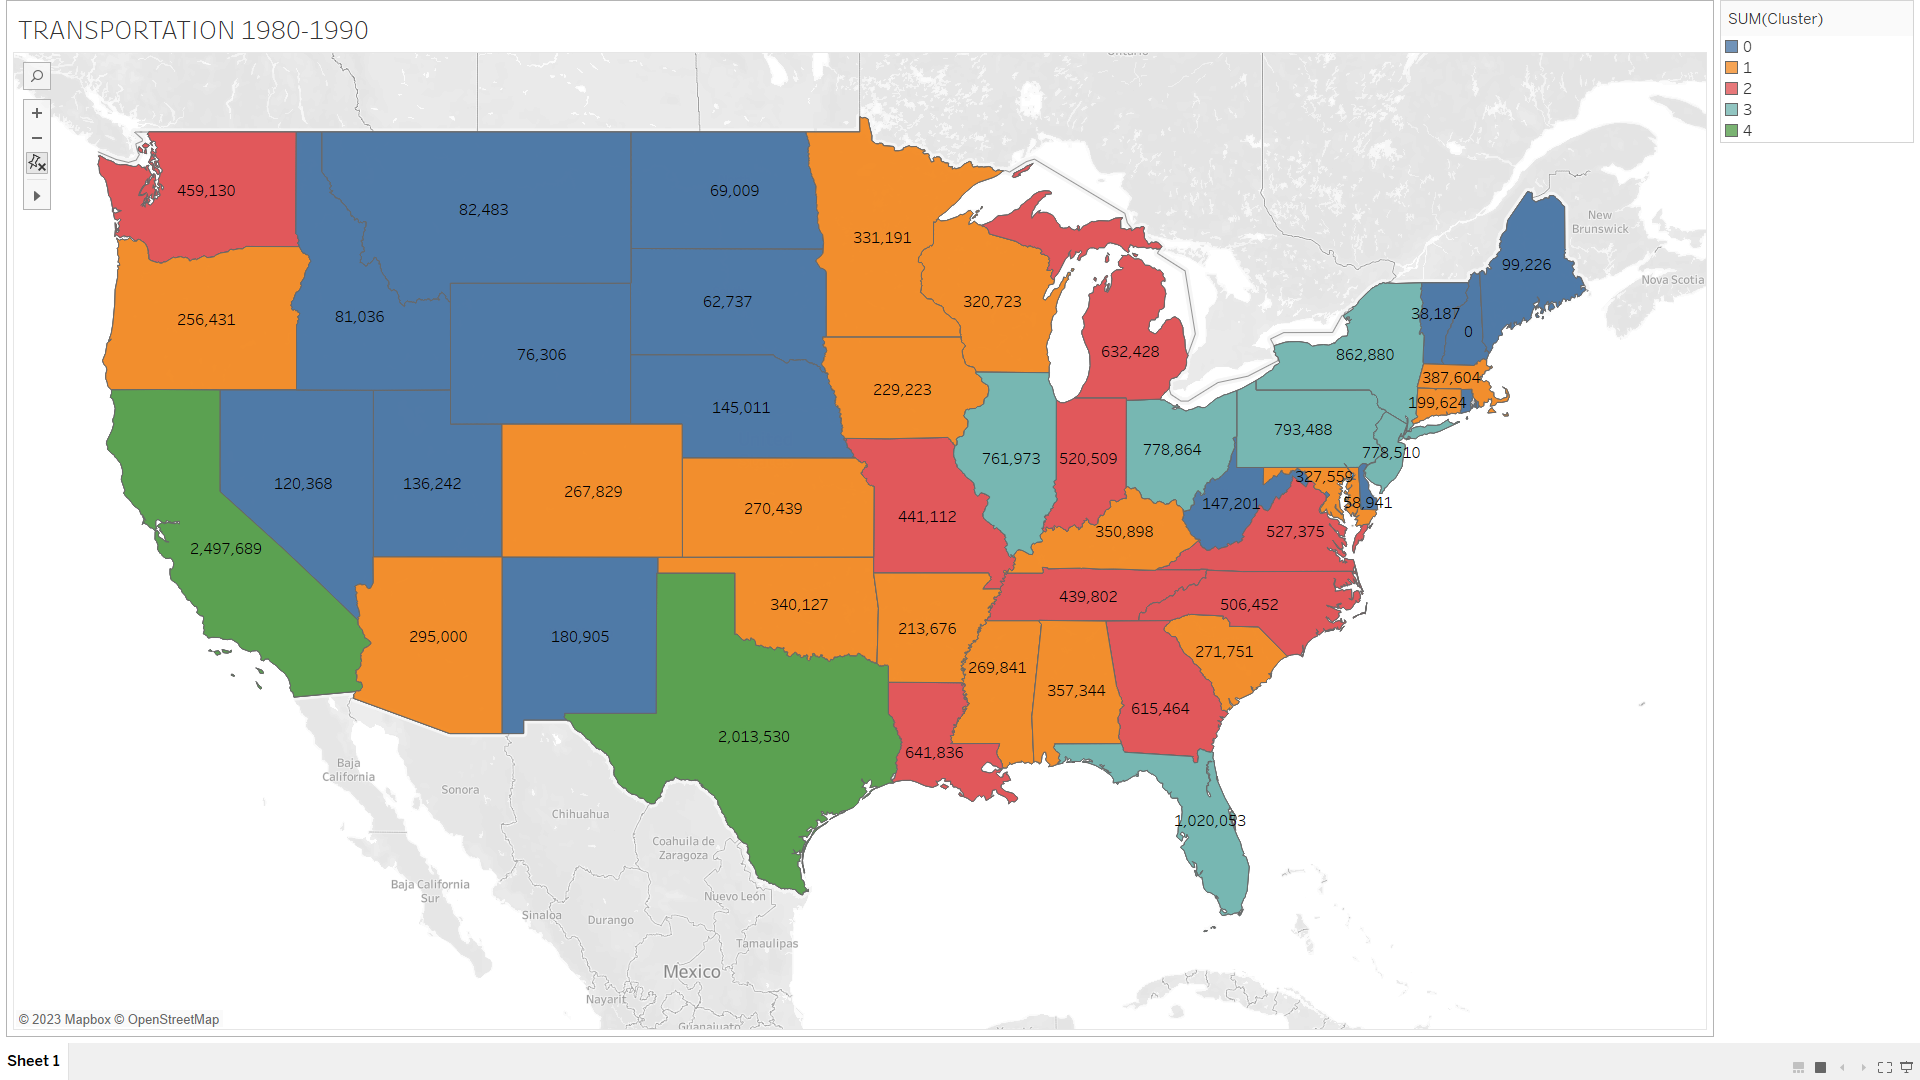

### Average for 1999 to 2000 and dividing it into 5 clusters

In [9]:
# Combine the average values for 1990-2000
average_values = pd.concat([average_1990_2000], axis=1)
average_values.columns = ['1990-2000']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='1990-2000')

# Round off the values to 2 decimal places
average_values['1990-2000'] = average_values['1990-2000'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['1990-2000'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='1990-2000') 
    cluster_min = cluster_states['1990-2000'].min()
    cluster_max = cluster_states['1990-2000'].max()
    for state, value in zip(cluster_states.index, cluster_states['1990-2000']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Transportation_1990-2000.csv', index=True)



States in Cluster 0:
State: DC - Value: 27166.0
State: VT - Value: 48920.7
State: RI - Value: 60272.5
State: DE - Value: 66121.1
State: ND - Value: 73442.1
State: SD - Value: 77300.6
State: NH - Value: 84870.1
State: WY - Value: 93871.0
State: MT - Value: 95816.0
State: ME - Value: 107998.1
State: ID - Value: 108464.0
State: HI - Value: 130463.7
State: NV - Value: 168155.3
State: NE - Value: 168489.5
State: WV - Value: 171362.1
State: AK - Value: 176896.7
State: UT - Value: 184300.8
State: CT - Value: 213020.0
State: NM - Value: 217707.1
Cluster 0 Range: 27166.00 - 217707.10

States in Cluster 1:
State: IA - Value: 255109.1
State: AR - Value: 261217.8
State: KS - Value: 266804.5
State: OR - Value: 309079.8
State: CO - Value: 320593.5
State: SC - Value: 334807.7
State: MS - Value: 341294.3
State: MD - Value: 362361.8
State: OK - Value: 378792.1
State: WI - Value: 386610.9
State: AZ - Value: 388212.6
State: MA - Value: 412438.3
State: KY - Value: 413837.6
State: MN - Value: 434512.1
Sta

### Mapping using Tablaue

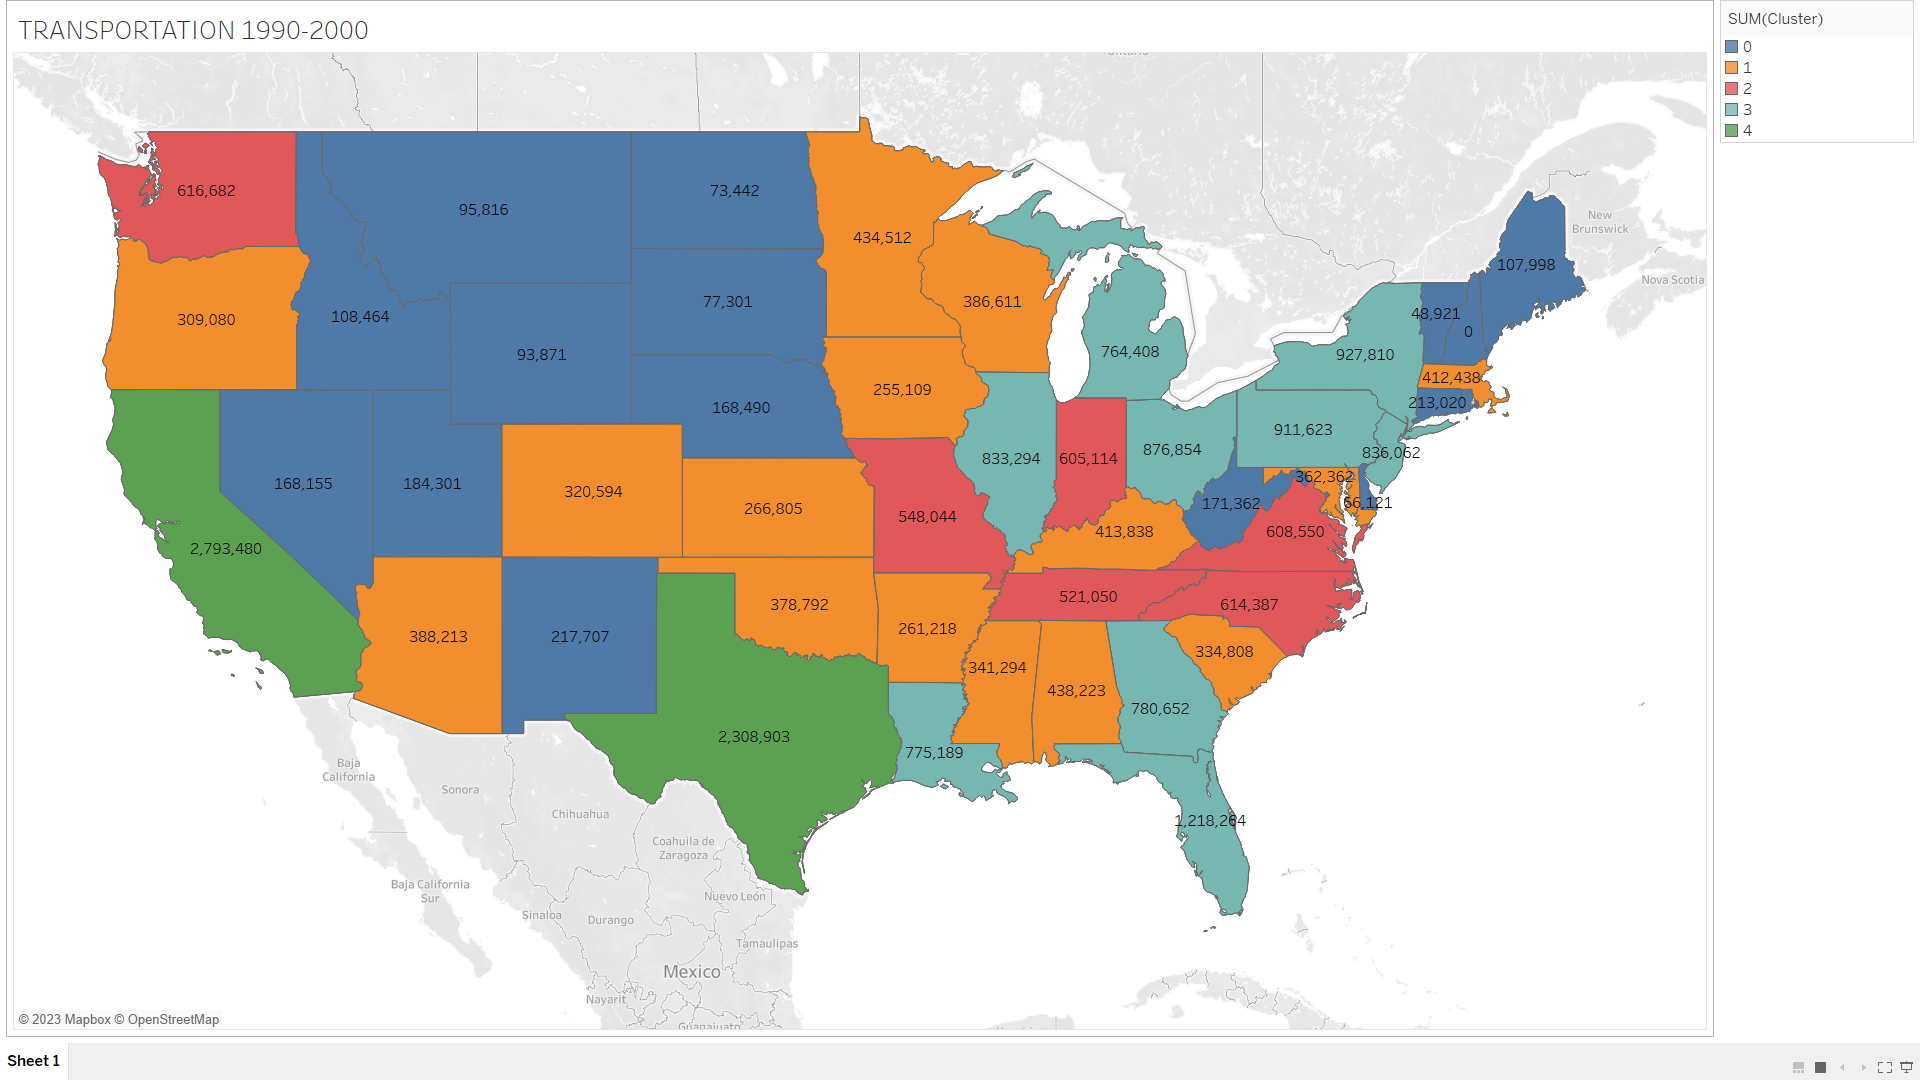

### Average for 2000 to 2010 and dividing it into 5 clusters

In [10]:
# Combine the average values for 2000-2010
average_values = pd.concat([average_2000_2010], axis=1)
average_values.columns = ['2000-2010']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='2000-2010')

# Round off the values to 2 decimal places 
average_values['2000-2010'] = average_values['2000-2010'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['2000-2010'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='2000-2010')  
    cluster_min = cluster_states['2000-2010'].min()
    cluster_max = cluster_states['2000-2010'].max()
    for state, value in zip(cluster_states.index, cluster_states['2000-2010']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Transportation_2000-2010.csv', index=True)



States in Cluster 0:
State: DC - Value: 22705.8
State: VT - Value: 52255.1
State: RI - Value: 63263.3
State: DE - Value: 71275.9
State: SD - Value: 88494.9
State: ND - Value: 92460.7
State: NH - Value: 105529.7
State: MT - Value: 114107.5
State: WY - Value: 118934.9
State: ME - Value: 122428.4
State: ID - Value: 125804.3
State: HI - Value: 158762.0
State: WV - Value: 174996.7
State: NE - Value: 176045.6
State: NM - Value: 215845.6
State: AK - Value: 227697.0
State: NV - Value: 229828.0
State: UT - Value: 234380.0
State: CT - Value: 250511.0
State: KS - Value: 271766.1
State: AR - Value: 286695.7
State: IA - Value: 295665.0
State: OR - Value: 322992.1
Cluster 0 Range: 22705.80 - 322992.10

States in Cluster 1:
State: MS - Value: 360182.7
State: CO - Value: 412195.7
State: SC - Value: 426713.5
State: WI - Value: 431051.2
State: MD - Value: 439873.4
State: OK - Value: 446369.1
State: MA - Value: 464376.4
State: KY - Value: 468027.0
State: AL - Value: 475918.4
State: MN - Value: 507015.2


### Mapping using Tablaue

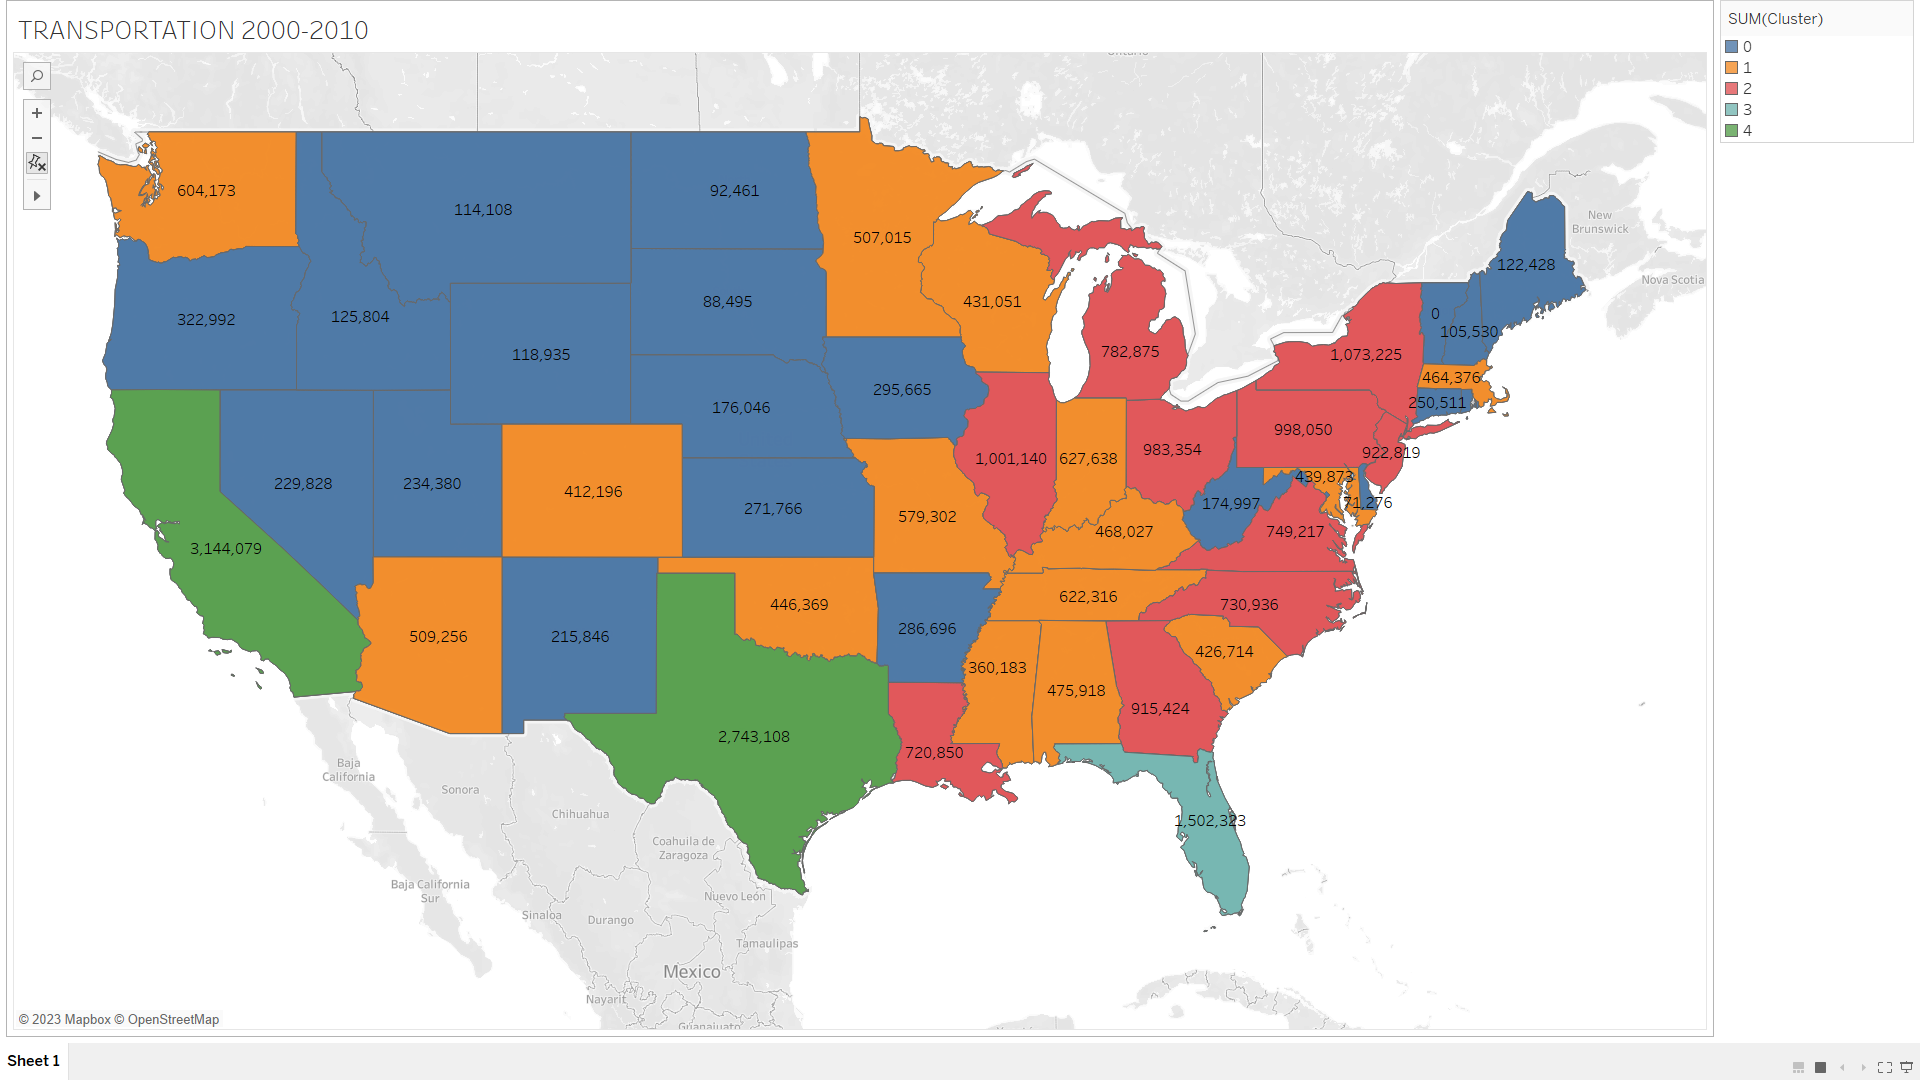

### Average for 2010 to 2020 and dividing it into 5 clusters

In [11]:
# Combine the average values for 2010-2020
average_values = pd.concat([average_2010_2020], axis=1)
average_values.columns = ['2010-2020']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='2010-2020')

# Round off the values to 2 decimal places 
average_values['2010-2020'] = average_values['2010-2020'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['2010-2020'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='2010-2020')  
    cluster_min = cluster_states['2010-2020'].min()
    cluster_max = cluster_states['2010-2020'].max()
    for state, value in zip(cluster_states.index, cluster_states['2010-2020']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Transportation_2010-2020.csv', index=True)



States in Cluster 0:
State: DC - Value: 19955.7
State: VT - Value: 46913.5
State: RI - Value: 57889.5
State: DE - Value: 75485.0
State: SD - Value: 98813.9
State: NH - Value: 100830.0
State: WY - Value: 113660.4
State: MT - Value: 115901.5
State: ME - Value: 117198.4
State: ND - Value: 132857.9
State: ID - Value: 150585.7
State: HI - Value: 159855.1
State: AK - Value: 162510.6
State: WV - Value: 175593.7
State: NE - Value: 199847.3
State: NM - Value: 213723.9
State: CT - Value: 226936.8
State: UT - Value: 252499.7
State: NV - Value: 259116.0
State: KS - Value: 276675.6
State: AR - Value: 281354.1
State: IA - Value: 300857.7
State: OR - Value: 302038.4
Cluster 0 Range: 19955.70 - 302038.40

States in Cluster 1:
State: MS - Value: 335882.3
State: CO - Value: 423622.9
State: WI - Value: 432474.2
State: MD - Value: 445315.3
State: MA - Value: 454777.4
State: OK - Value: 462444.1
State: SC - Value: 463081.6
State: KY - Value: 466483.8
State: MN - Value: 470909.6
State: AL - Value: 485373.4

### Mapping using Tablaue

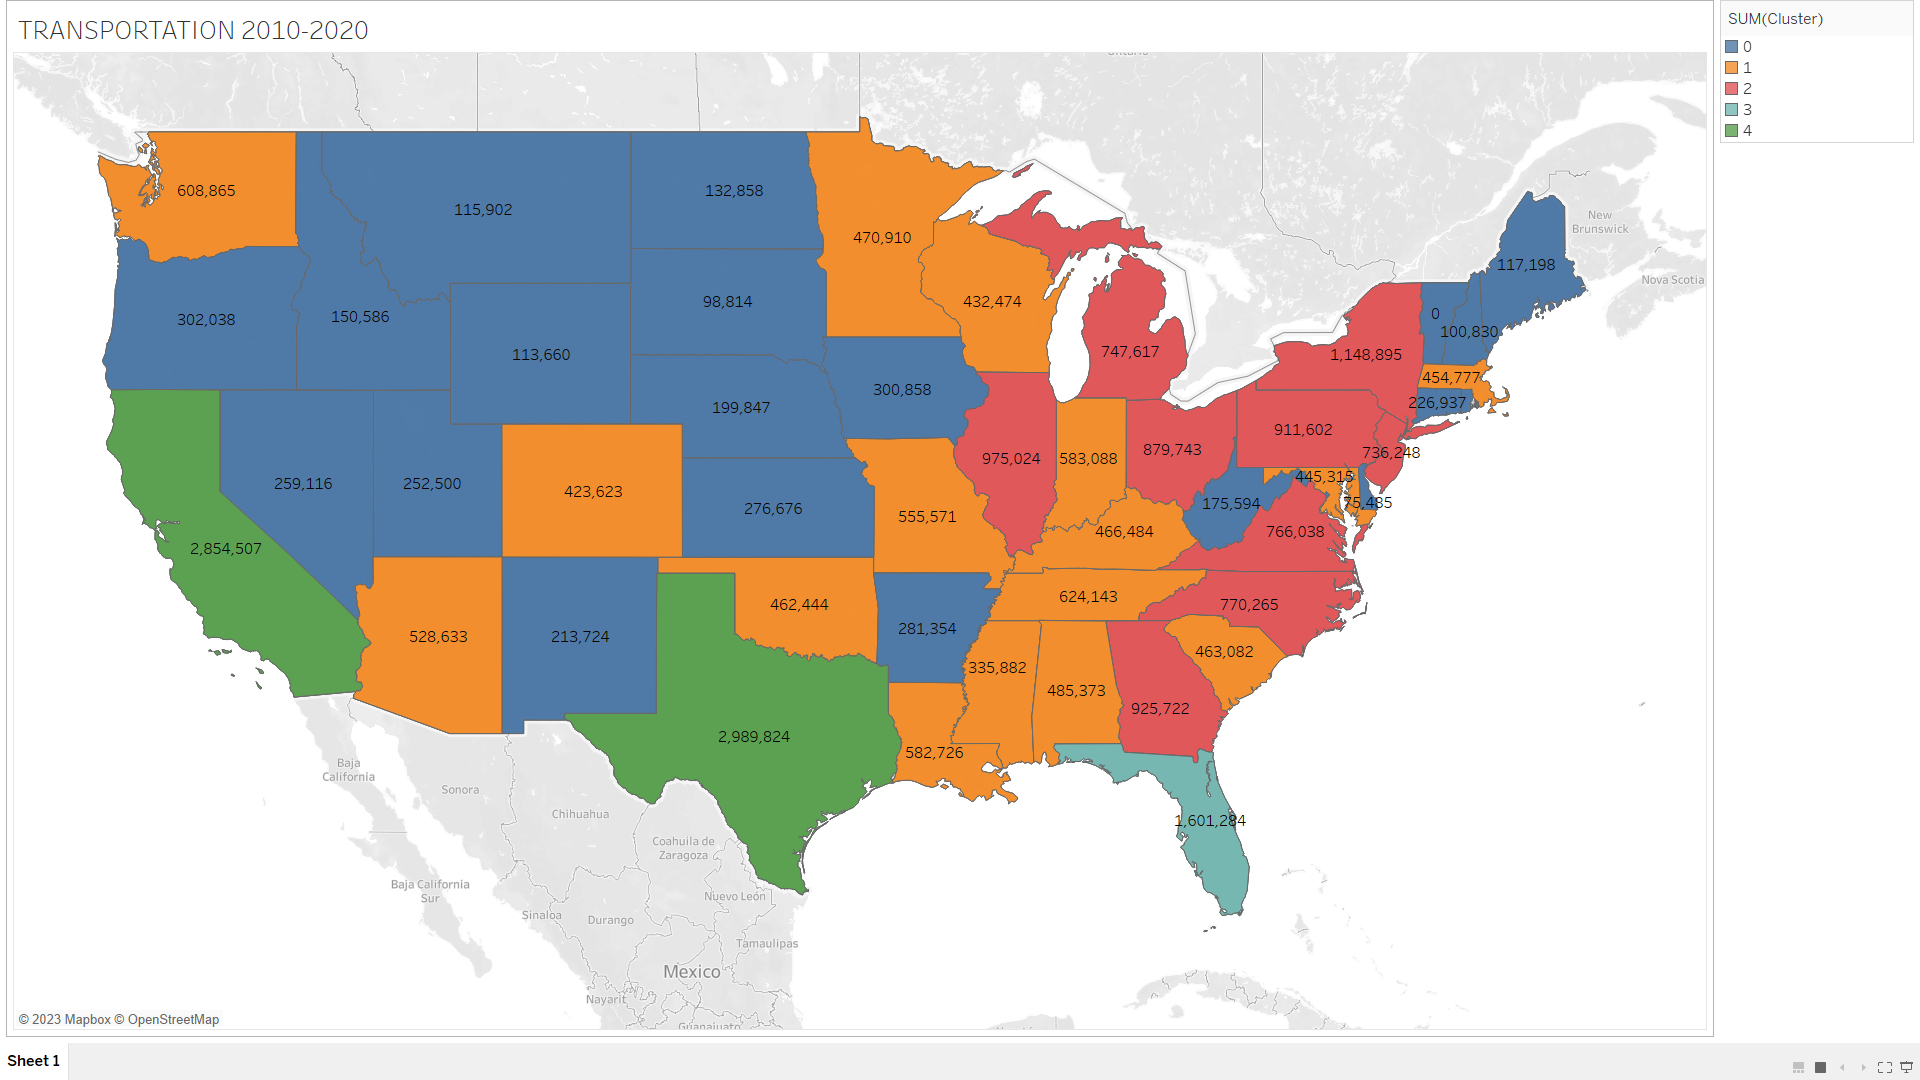

## Progression of the top 3 states 

### Progress of the states from 1960 to 1970

In [15]:
# Load the CSV file and read it
file_path = 'Transportation_1960_1970.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations to retrieve information 
state_abbreviations = ['TX','CA','FL']

# Find the rows corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 1960-1970 interval
print("Information for states in the 1960-1970 interval:")
print(state_info)

Information for states in the 1960-1970 interval:
     1960-1970  Cluster State Full Name
FL   466095.82        2         Florida
TX   957957.55        3           Texas
CA  1526365.82        4      California


### Progress of the states from 1970 to 1980

In [16]:
# Load the CSV file and read it
file_path = 'Transportation_1970-1980.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations to retrieve information 
state_abbreviations = ['TX','CA','FL']

# Find the rows corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 1970-1980 interval
print("Information for states in the 1970-1980 interval:")
print(state_info)


Information for states in the 1970-1980 interval:
    1970-1980  Cluster State Full Name
FL   797615.1        3         Florida
TX  1602869.0        4           Texas
CA  2104785.6        4      California


### Progress of the states from 1980 to 1990

In [17]:
# Load the CSV file and read it
file_path = 'Transportation_1980-1990.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations to retrieve information 
state_abbreviations = ['TX','CA','FL']

# Find the rows corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 1970-1980 interval
print("Information for states in the 1980-1990 interval:")
print(state_info)


Information for states in the 1980-1990 interval:
    1980-1990  Cluster State Full Name
FL  1020053.2        3         Florida
TX  2013530.1        4           Texas
CA  2497688.8        4      California


### Progress of the states from 1999 to 2000

In [18]:
# Load the CSV file and read it
file_path = 'Transportation_1990-2000.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations to retrieve information 
state_abbreviations = ['TX','CA','FL']

# Find the rows corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 1970-1980 interval
print("Information for states in the 1990-2000 interval:")
print(state_info)


Information for states in the 1990-2000 interval:
    1990-2000  Cluster State Full Name
FL  1218264.3        3         Florida
TX  2308903.3        4           Texas
CA  2793480.3        4      California


### Progress of the states from 2000 to 2010

In [19]:
# Load the CSV file and read it
file_path = 'Transportation_2000-2010.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations to retrieve information 
state_abbreviations = ['TX','CA','FL']

# Find the rows corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 2000-2010 interval
print("Information for states in the 2000-2010 interval:")
print(state_info)


Information for states in the 2000-2010 interval:
    2000-2010  Cluster State Full Name
FL  1502323.1        3         Florida
TX  2743108.0        4           Texas
CA  3144078.8        4      California


### Progress of the states from 2010 to 2020

In [20]:
# Load the CSV file and read it
file_path = 'Transportation_2010-2020.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations to retrieve information 
state_abbreviations = ['TX','CA','FL']

# Find the rows corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 1970-1980 interval
print("Information for states in the 2010-2020 interval:")
print(state_info)


Information for states in the 2010-2020 interval:
    2000-2010  Cluster State Full Name
FL  1502323.1        3         Florida
TX  2743108.0        4           Texas
CA  3144078.8        4      California


### Ploting the states using Matplot`

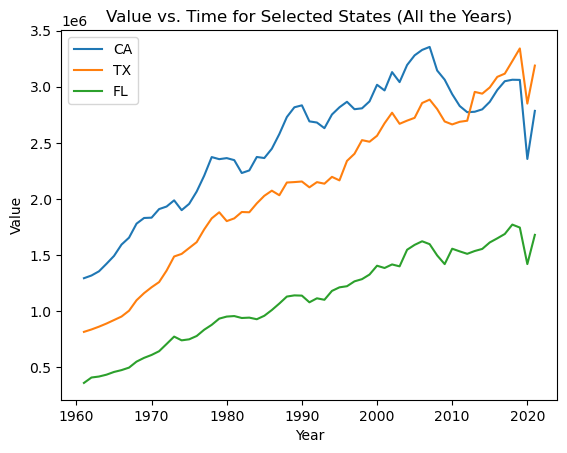

In [11]:
# Select only the 60 columns
Transportation_60 = Transportation.iloc[:, 1:62]

# Transpose the data to have years as rows and states as columns
Transportation_T_60 = Transportation_60.transpose()

# list of state abbreviations to plot
state_abbreviations =  ['CA','TX','FL']

# Plot data for the selected states with the correct legend label
for state in state_abbreviations:
    plt.plot(Transportation_T_60.index, Transportation_T_60[state], label=state)

# Add x-labels
plt.xlabel('Year')
# Add y-labels
plt.ylabel('Value')
# Add title
plt.title('Value vs. Time for Selected States (All the Years)')
plt.legend(loc='best')

# Show the plot
plt.show()

## Deep Learning Forecasting

### LSTM

In [4]:
# sequence length and accuracy threshold
sequence_length_lstm = 40
accuracy_threshold_lstm = 0.01  

# Loop through each selected state
state_mse_lstm = {}
state_rmse_lstm = {}
state_forecasts_lstm = {}
state_predictions_lstm = {} 

for state in ['TX','CA','FL']:
    # Extract the data for the selected state
    data = Transportation.loc[state].values

    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))

    # sequences for LSTM
    sequences = []
    targets = []
    for i in range(len(scaled_data) - sequence_length_lstm):
        seq = scaled_data[i:i + sequence_length_lstm]
        target = scaled_data[i + sequence_length_lstm]
        sequences.append(seq)
        targets.append(target)
    x_train, y_train = np.array(sequences), np.array(targets)

    # Include data beyond 1969 for training
    x_train_full, y_train_full = x_train[:len(x_train)], y_train[:len(y_train)]

    # train an LSTM model
    model_lstm = Sequential()
    model_lstm.add(LSTM(units=50, activation='relu', input_shape=(sequence_length_lstm, 1)))
    model_lstm.add(Dense(units=1))
    model_lstm.compile(optimizer='adam', loss='mean_squared_error')

    # Lists to store forecasts, actual values, and predictions
    forecasts_lstm = []
    actual_values_lstm = []
    predictions_lstm = []

    # Iterate through the forecast years
    current_sequence_lstm = x_train_full[-1]
    for year in range(len(x_train), len(scaled_data)):
        forecast_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
        actual_value_lstm = scaled_data[year]
        x_train_full = np.append(x_train_full, current_sequence_lstm.reshape(1, sequence_length_lstm, 1), axis=0)
        y_train_full = np.append(y_train_full, actual_value_lstm)
        mse_lstm = mean_squared_error([actual_value_lstm], [forecast_lstm[0]])
        model_lstm.fit(x_train_full, y_train_full, epochs=20, batch_size=1)
        current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_lstm[0])

        # If prediction accuracy is below the threshold, retrain and predict again
        if mse_lstm > accuracy_threshold_lstm:
            continue
        else:
            forecasts_lstm.append(forecast_lstm[0])
            actual_values_lstm.append(actual_value_lstm)

            # Store the prediction for the current year
            prediction_lstm = scaler.inverse_transform(forecast_lstm.reshape(-1, 1))[0][0]
            predictions_lstm.append(prediction_lstm)

    # Inverse transform the forecasts and actual values to the original scale
    forecasts_lstm = scaler.inverse_transform(np.array(forecasts_lstm).reshape(-1, 1))
    actual_values_lstm = scaler.inverse_transform(np.array(actual_values_lstm).reshape(-1, 1))

    # Calculate the mean squared error (MSE) for the forecasts
    mse_lstm = mean_squared_error(actual_values_lstm, forecasts_lstm)

    # Calculate the root mean squared error (RMSE)
    rmse_lstm = np.sqrt(mse_lstm)

    state_mse_lstm[state] = mse_lstm
    state_rmse_lstm[state] = rmse_lstm

    # Forecast for 2022 and 2023
    forecast_2022_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2022_lstm[0])
    forecast_2023_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))

    # Inverse transform the forecasts to the original scale
    forecast_2022_lstm = scaler.inverse_transform(forecast_2022_lstm.reshape(-1, 1))[0][0]
    forecast_2023_lstm = scaler.inverse_transform(forecast_2023_lstm.reshape(-1, 1))[0][0]
    state_forecasts_lstm[state] = {'2022': forecast_2022_lstm, '2023': forecast_2023_lstm}

    # Forecast and Store predictions for 2019
    forecast_2019_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2019_lstm[0])
    # Forecast and Store predictions for 2020
    forecast_2020_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2020_lstm[0])
    # Forecast and Store predictions for 2021
    forecast_2021_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2021_lstm[0])

    # Inverse transform the predictions for 2019
    prediction_2019_lstm = scaler.inverse_transform(forecast_2019_lstm.reshape(-1, 1))[0][0]
    # Inverse transform the predictions for 2020
    prediction_2020_lstm = scaler.inverse_transform(forecast_2020_lstm.reshape(-1, 1))[0][0]
    # Inverse transform the predictions for 2021
    prediction_2021_lstm = scaler.inverse_transform(forecast_2021_lstm.reshape(-1, 1))[0][0]
    state_predictions_lstm[state] = {'2019': prediction_2019_lstm, '2020': prediction_2020_lstm, '2021': prediction_2021_lstm}

# Print MSE and RMSE for all states
print("\nMean Squared Error (MSE) for All States:")
for state, mse_value in state_mse_lstm.items():
    print(f"MSE for {state} (LSTM): {mse_value:.2f}")

print("\nRoot Mean Squared Error (RMSE) for All States:")
for state, rmse_value in state_rmse_lstm.items():
    print(f"RMSE for {state} (LSTM): {rmse_value:.2f}")

# Print forecasts for all states
print("\nForecasts for All States:")
for state, forecasts in state_forecasts_lstm.items():
    print(f"Forecasts for {state} - 2022: {forecasts['2022']:.2f}, 2023: {forecasts['2023']:.2f}")

# Print predictions for 2019, 2020, and 2021 for all states
print("\nPredictions for 2019, 2020, and 2021 for All States:")
for state, predictions in state_predictions_lstm.items():
    print(f"Predictions for {state} - 2019: {predictions['2019']:.2f}, 2020: {predictions['2020']:.2f}, 2021: {predictions['2021']:.2f}")

# Calculate and store accuracy for each state and year
state_accuracies_lstm = {}

for state in state_predictions_lstm:
    accuracies_state = {'2019': [], '2020': [], '2021': []}
    for year in ['2019', '2020', '2021']:
        actual_value = Transportation.loc[state].loc[int(year)]
        predicted_value = state_predictions_lstm[state][year]
        accuracy = 100 - abs((predicted_value - actual_value) / actual_value) * 100
        accuracies_state[year].append(accuracy)
    state_accuracies_lstm[state] = accuracies_state

# Print accuracies for each state and year
print("\nAccuracies for Predictions (2019, 2020, 2021) - Individual States:")
for state, accuracies_state in state_accuracies_lstm.items():
    for year, accuracies in accuracies_state.items():
        average_accuracy = sum(accuracies) / len(accuracies)
        print(f"Average Accuracy for {state} - {year}: {average_accuracy:.2f}%")

1/1 [==============================] - 1s 1s/step
Epoch 1/20
23/23 [==============================] - 7s 23ms/step - loss: 0.2687
Epoch 2/20
23/23 [==============================] - 1s 24ms/step - loss: 0.0266
Epoch 3/20
23/23 [==============================] - 0s 19ms/step - loss: 0.0252
Epoch 4/20
23/23 [==============================] - 1s 22ms/step - loss: 0.0155
Epoch 5/20
23/23 [==============================] - 1s 23ms/step - loss: 0.0195
Epoch 6/20
23/23 [==============================] - 1s 28ms/step - loss: 0.0149
Epoch 7/20
23/23 [==============================] - 0s 19ms/step - loss: 0.0150
Epoch 8/20
23/23 [==============================] - 0s 16ms/step - loss: 0.0151
Epoch 9/20
23/23 [==============================] - 0s 15ms/step - loss: 0.0209
Epoch 10/20
23/23 [==============================] - 0s 19ms/step - loss: 0.0211
Epoch 11/20
23/23 [==============================] - 0s 16ms/step - loss: 0.0174
Epoch 12/20
23/23 [==============================] - 0s 16ms/step - 

32/32 [==============================] - 1s 21ms/step - loss: 0.0073
Epoch 18/20
32/32 [==============================] - 1s 18ms/step - loss: 0.0072
Epoch 19/20
32/32 [==============================] - 1s 19ms/step - loss: 0.0068
Epoch 20/20
1/1 [==============================] - 0s 140ms/step
Epoch 1/20
33/33 [==============================] - 1s 18ms/step - loss: 0.0076
Epoch 2/20
33/33 [==============================] - 1s 20ms/step - loss: 0.0065
Epoch 3/20
33/33 [==============================] - 1s 18ms/step - loss: 0.0072
Epoch 4/20
33/33 [==============================] - 1s 19ms/step - loss: 0.0067
Epoch 5/20
33/33 [==============================] - 1s 20ms/step - loss: 0.0080
Epoch 6/20
33/33 [==============================] - 1s 21ms/step - loss: 0.0064
Epoch 7/20
33/33 [==============================] - 1s 16ms/step - loss: 0.0073
Epoch 8/20
33/33 [==============================] - 1s 19ms/step - loss: 0.0069
Epoch 9/20
33/33 [==============================] - 1s 20ms/step

42/42 [==============================] - 1s 23ms/step - loss: 0.0047
Epoch 14/20
42/42 [==============================] - 1s 21ms/step - loss: 0.0048
Epoch 15/20
42/42 [==============================] - 1s 22ms/step - loss: 0.0048
Epoch 16/20
42/42 [==============================] - 1s 18ms/step - loss: 0.0046
Epoch 17/20
42/42 [==============================] - 1s 23ms/step - loss: 0.0045
Epoch 18/20
42/42 [==============================] - 1s 21ms/step - loss: 0.0051
Epoch 19/20
42/42 [==============================] - 1s 19ms/step - loss: 0.0065
Epoch 20/20
1/1 [==============================] - 1s 565ms/step
Epoch 1/20
43/43 [==============================] - 1s 21ms/step - loss: 0.0046
Epoch 2/20
43/43 [==============================] - 1s 23ms/step - loss: 0.0046
Epoch 3/20
43/43 [==============================] - 1s 18ms/step - loss: 0.0044
Epoch 4/20
43/43 [==============================] - 1s 16ms/step - loss: 0.0045
Epoch 5/20
43/43 [==============================] - 1s 23ms/

52/52 [==============================] - 1s 14ms/step - loss: 0.0036
Epoch 10/20
52/52 [==============================] - 1s 12ms/step - loss: 0.0044
Epoch 11/20
52/52 [==============================] - 1s 12ms/step - loss: 0.0044
Epoch 12/20
52/52 [==============================] - 1s 13ms/step - loss: 0.0043
Epoch 13/20
52/52 [==============================] - 1s 12ms/step - loss: 0.0044
Epoch 14/20
52/52 [==============================] - 1s 13ms/step - loss: 0.0047
Epoch 15/20
52/52 [==============================] - 1s 12ms/step - loss: 0.0036
Epoch 16/20
52/52 [==============================] - 1s 12ms/step - loss: 0.0043
Epoch 17/20
52/52 [==============================] - 1s 14ms/step - loss: 0.0042
Epoch 18/20
52/52 [==============================] - 1s 14ms/step - loss: 0.0043
Epoch 19/20
52/52 [==============================] - 1s 15ms/step - loss: 0.0051
Epoch 20/20
1/1 [==============================] - 0s 153ms/step
Epoch 1/20
53/53 [==============================] - 1s 1

62/62 [==============================] - 1s 9ms/step - loss: 0.0046
Epoch 6/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0039
Epoch 7/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0039
Epoch 8/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0037
Epoch 9/20
62/62 [==============================] - 1s 11ms/step - loss: 0.0036
Epoch 10/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0039
Epoch 11/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0039
Epoch 12/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0034
Epoch 13/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0037
Epoch 14/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0035
Epoch 15/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0034
Epoch 16/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0034
Epoch 17/20
62/62 [==============================] - 1s

1/1 [==============================] - 0s 24ms/step
Epoch 1/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0052
Epoch 2/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0051
Epoch 3/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0048
Epoch 4/20
32/32 [==============================] - 0s 8ms/step - loss: 0.0056
Epoch 5/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0048
Epoch 6/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0048
Epoch 7/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0045
Epoch 8/20
32/32 [==============================] - 0s 8ms/step - loss: 0.0065
Epoch 9/20
32/32 [==============================] - 0s 8ms/step - loss: 0.0047
Epoch 10/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0062
Epoch 11/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0051
Epoch 12/20
32/32 [==============================] - 0s 9ms/step - loss: 0.00

41/41 [==============================] - 0s 10ms/step - loss: 0.0029
Epoch 20/20
1/1 [==============================] - 0s 38ms/step
Epoch 1/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0028
Epoch 2/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0027
Epoch 3/20
42/42 [==============================] - 0s 12ms/step - loss: 0.0028
Epoch 4/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0026
Epoch 5/20
42/42 [==============================] - 0s 11ms/step - loss: 0.0035
Epoch 6/20
42/42 [==============================] - 0s 11ms/step - loss: 0.0031
Epoch 7/20
42/42 [==============================] - 0s 11ms/step - loss: 0.0028
Epoch 8/20
42/42 [==============================] - 0s 11ms/step - loss: 0.0029
Epoch 9/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0027
Epoch 10/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0035
Epoch 11/20
42/42 [==============================] - 0s 10ms/step -

51/51 [==============================] - 1s 15ms/step - loss: 0.0027
Epoch 16/20
51/51 [==============================] - 1s 15ms/step - loss: 0.0034
Epoch 17/20
51/51 [==============================] - 1s 16ms/step - loss: 0.0031
Epoch 18/20
51/51 [==============================] - 1s 15ms/step - loss: 0.0029
Epoch 19/20
51/51 [==============================] - 1s 12ms/step - loss: 0.0032
Epoch 20/20
1/1 [==============================] - 0s 109ms/step
Epoch 1/20
52/52 [==============================] - 1s 14ms/step - loss: 0.0035
Epoch 2/20
52/52 [==============================] - 1s 15ms/step - loss: 0.0031
Epoch 3/20
52/52 [==============================] - 1s 14ms/step - loss: 0.0026
Epoch 4/20
52/52 [==============================] - 1s 17ms/step - loss: 0.0031
Epoch 5/20
52/52 [==============================] - 1s 13ms/step - loss: 0.0027
Epoch 6/20
52/52 [==============================] - 1s 15ms/step - loss: 0.0028
Epoch 7/20
52/52 [==============================] - 1s 15ms/st

61/61 [==============================] - 1s 17ms/step - loss: 0.0033
Epoch 12/20
61/61 [==============================] - 1s 16ms/step - loss: 0.0033
Epoch 13/20
61/61 [==============================] - 1s 12ms/step - loss: 0.0030
Epoch 14/20
61/61 [==============================] - 1s 12ms/step - loss: 0.0030
Epoch 15/20
61/61 [==============================] - 1s 12ms/step - loss: 0.0027
Epoch 16/20
61/61 [==============================] - 1s 12ms/step - loss: 0.0022
Epoch 17/20
61/61 [==============================] - 1s 12ms/step - loss: 0.0035
Epoch 18/20
61/61 [==============================] - 1s 12ms/step - loss: 0.0024
Epoch 19/20
61/61 [==============================] - 1s 11ms/step - loss: 0.0016
Epoch 20/20
1/1 [==============================] - 0s 53ms/step
Epoch 1/20
62/62 [==============================] - 1s 12ms/step - loss: 0.0022
Epoch 2/20
62/62 [==============================] - 1s 13ms/step - loss: 0.0022
Epoch 3/20
62/62 [==============================] - 1s 12ms

31/31 [==============================] - 0s 12ms/step - loss: 0.0095
Epoch 5/20
31/31 [==============================] - 0s 12ms/step - loss: 0.0097
Epoch 6/20
31/31 [==============================] - 0s 13ms/step - loss: 0.0094
Epoch 7/20
31/31 [==============================] - 0s 11ms/step - loss: 0.0096
Epoch 8/20
31/31 [==============================] - 0s 13ms/step - loss: 0.0094
Epoch 9/20
31/31 [==============================] - 0s 13ms/step - loss: 0.0119
Epoch 10/20
31/31 [==============================] - 0s 12ms/step - loss: 0.0097
Epoch 11/20
31/31 [==============================] - 0s 14ms/step - loss: 0.0090
Epoch 12/20
31/31 [==============================] - 0s 14ms/step - loss: 0.0098
Epoch 13/20
31/31 [==============================] - 0s 13ms/step - loss: 0.0088
Epoch 14/20
31/31 [==============================] - 1s 17ms/step - loss: 0.0093
Epoch 15/20
31/31 [==============================] - 1s 16ms/step - loss: 0.0094
Epoch 16/20
31/31 [==========================

1/1 [==============================] - 0s 142ms/step
Epoch 1/20
41/41 [==============================] - 1s 18ms/step - loss: 0.0061
Epoch 2/20
41/41 [==============================] - 1s 16ms/step - loss: 0.0056
Epoch 3/20
41/41 [==============================] - 1s 17ms/step - loss: 0.0056
Epoch 4/20
41/41 [==============================] - 1s 17ms/step - loss: 0.0063
Epoch 5/20
41/41 [==============================] - 1s 17ms/step - loss: 0.0057
Epoch 6/20
41/41 [==============================] - 1s 18ms/step - loss: 0.0050
Epoch 7/20
41/41 [==============================] - 1s 17ms/step - loss: 0.0051
Epoch 8/20
41/41 [==============================] - 1s 19ms/step - loss: 0.0053
Epoch 9/20
41/41 [==============================] - 1s 18ms/step - loss: 0.0054
Epoch 10/20
41/41 [==============================] - 1s 17ms/step - loss: 0.0051
Epoch 11/20
41/41 [==============================] - 1s 17ms/step - loss: 0.0056
Epoch 12/20
41/41 [==============================] - 1s 18ms/step

50/50 [==============================] - 1s 21ms/step - loss: 0.0043
Epoch 18/20
50/50 [==============================] - 1s 17ms/step - loss: 0.0044
Epoch 19/20
50/50 [==============================] - 1s 16ms/step - loss: 0.0042
Epoch 20/20
1/1 [==============================] - 0s 58ms/step
Epoch 1/20
51/51 [==============================] - 1s 12ms/step - loss: 0.0046
Epoch 2/20
51/51 [==============================] - 1s 13ms/step - loss: 0.0047
Epoch 3/20
51/51 [==============================] - 1s 17ms/step - loss: 0.0042
Epoch 4/20
51/51 [==============================] - 1s 14ms/step - loss: 0.0040
Epoch 5/20
51/51 [==============================] - 1s 14ms/step - loss: 0.0052
Epoch 6/20
51/51 [==============================] - 1s 13ms/step - loss: 0.0045
Epoch 7/20
51/51 [==============================] - 1s 14ms/step - loss: 0.0127
Epoch 8/20
51/51 [==============================] - 1s 13ms/step - loss: 0.0102
Epoch 9/20
51/51 [==============================] - 1s 13ms/step 

60/60 [==============================] - 1s 13ms/step - loss: 0.0051
Epoch 14/20
60/60 [==============================] - 1s 14ms/step - loss: 0.0048
Epoch 15/20
60/60 [==============================] - 1s 13ms/step - loss: 0.0053
Epoch 16/20
60/60 [==============================] - 1s 12ms/step - loss: 0.0048
Epoch 17/20
60/60 [==============================] - 1s 14ms/step - loss: 0.0050
Epoch 18/20
60/60 [==============================] - 1s 19ms/step - loss: 0.0049
Epoch 19/20
60/60 [==============================] - 1s 16ms/step - loss: 0.0045
Epoch 20/20
1/1 [==============================] - 0s 139ms/step
Epoch 1/20
61/61 [==============================] - 1s 15ms/step - loss: 0.0049
Epoch 2/20
61/61 [==============================] - 1s 18ms/step - loss: 0.0050
Epoch 3/20
61/61 [==============================] - 1s 17ms/step - loss: 0.0049
Epoch 4/20
61/61 [==============================] - 1s 14ms/step - loss: 0.0051
Epoch 5/20
61/61 [==============================] - 1s 14ms/

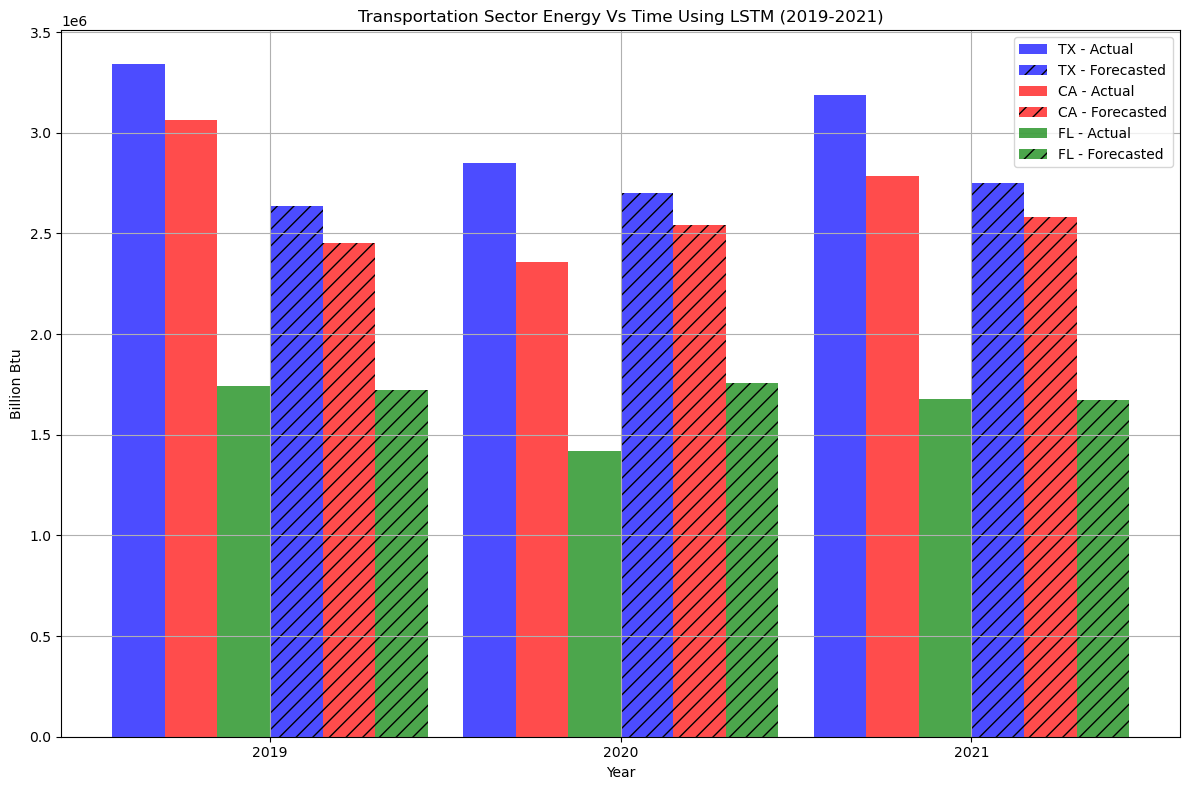

In [12]:
# list of state abbreviations to plot
state_abbreviations =  ['TX','CA','FL']

# Use iloc to get the required years (2019 to 2021) from the end
selected_years = Transportation_T_60.iloc[-3:]
years_forecast = selected_years

# width of the bars
bar_width = 0.15

# Define colors for each state
state_colors = {'TX': 'blue', 'CA': 'red','FL': 'green'}

# bar plot for the actual and forecasted values
plt.figure(figsize=(12, 8))

for i, state in enumerate(state_abbreviations):
    # Calculate the x positions for the bars, introducing an offset for each state
    x_positions_actual = np.arange(len(selected_years.index)) + i * bar_width
    x_positions_forecasted = np.arange(len(years_forecast)) + (len(state_abbreviations) + i) * bar_width

    # Use the color assigned to the state for both actual and forecasted bars
    plt.bar(x_positions_actual, selected_years[state], label=f"{state} - Actual", width=bar_width, color=state_colors[state], alpha=0.7)
    plt.bar(x_positions_forecasted, state_predictions_lstm[state].values(), bar_width,
            label=f"{state} - Forecasted", hatch='//', color=state_colors[state], alpha=0.7)
# x-labels
plt.xlabel('Year')
# y-labels 
plt.ylabel('Billion Btu')
# title
plt.title('Transportation Sector Energy Vs Time Using LSTM (2019-2021)')
# Add legend
plt.legend()

# Set x-axis ticks and labels
combined_years = np.arange(len(selected_years.index)) + (len(state_abbreviations) - 0.5) * bar_width
plt.xticks(combined_years, selected_years.index)  

# Add grid
plt.grid(True)
plt.tight_layout()
# Show the plot
plt.show()

### GRU

In [13]:
# sequence length and accuracy threshold
sequence_length_gru = 40
accuracy_threshold_gru = 0.01  

# Loop through each selected state
state_mse_gru = {}
state_rmse_gru = {}
state_forecasts_gru = {}
state_predictions_gru = {} 

for state in ['TX','CA','FL']:
    # Extract the data for the selected state
    data = Transportation.loc[state].values

    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))

    # sequences for GRU
    sequences = []
    targets = []
    for i in range(len(scaled_data) - sequence_length_gru):
        seq = scaled_data[i:i + sequence_length_gru]
        target = scaled_data[i + sequence_length_gru]
        sequences.append(seq)
        targets.append(target)
    x_train, y_train = np.array(sequences), np.array(targets)

    # Include training data
    x_train_full, y_train_full = x_train[:len(x_train)], y_train[:len(y_train)]

    # train a GRU model
    model_gru = Sequential()
    model_gru.add(GRU(units=50, activation='relu', input_shape=(sequence_length_gru, 1)))
    model_gru.add(Dense(units=1))
    model_gru.compile(optimizer='adam', loss='mean_squared_error')

    # Lists to store forecasts, actual values, and predictions
    forecasts_gru = []
    actual_values_gru = []
    predictions_gru = []

    # Iterate through the forecast years
    current_sequence_gru = x_train_full[-1]
    for year in range(len(x_train), len(scaled_data)):
        forecast_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
        actual_value_gru = scaled_data[year]
        x_train_full = np.append(x_train_full, current_sequence_gru.reshape(1, sequence_length_gru, 1), axis=0)
        y_train_full = np.append(y_train_full, actual_value_gru)
        mse_gru = mean_squared_error([actual_value_gru], [forecast_gru[0]])
        model_gru.fit(x_train_full, y_train_full, epochs=20, batch_size=1)
        current_sequence_gru = np.append(current_sequence_gru[1:], forecast_gru[0])

        # If prediction accuracy is below the threshold, retrain and predict again
        if mse_gru > accuracy_threshold_gru:
            continue
        else:
            forecasts_gru.append(forecast_gru[0])
            actual_values_gru.append(actual_value_gru)

            # Store the prediction for the current year
            prediction_gru = scaler.inverse_transform(forecast_gru.reshape(-1, 1))[0][0]
            predictions_gru.append(prediction_gru)

    # Inverse transform the forecasts and actual values to the original scale
    forecasts_gru = scaler.inverse_transform(np.array(forecasts_gru).reshape(-1, 1))
    actual_values_gru = scaler.inverse_transform(np.array(actual_values_gru).reshape(-1, 1))

    # Calculate the mean squared error (MSE) for the forecasts
    mse_gru = mean_squared_error(actual_values_gru, forecasts_gru)

    # Calculate the root mean squared error (RMSE)
    rmse_gru = np.sqrt(mse_gru)

    state_mse_gru[state] = mse_gru
    state_rmse_gru[state] = rmse_gru

    # Forecast for 2022 and 2023
    forecast_2022_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2022_gru[0])
    forecast_2023_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))

    # Inverse transform the forecasts to the original scale
    forecast_2022_gru = scaler.inverse_transform(forecast_2022_gru.reshape(-1, 1))[0][0]
    forecast_2023_gru = scaler.inverse_transform(forecast_2023_gru.reshape(-1, 1))[0][0]
    state_forecasts_gru[state] = {'2022': forecast_2022_gru, '2023': forecast_2023_gru}

    # Forecast and Store predictions for 2019
    forecast_2019_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2019_gru[0])
    # Forecast and Store predictions for 2020
    forecast_2020_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2020_gru[0])
    # Forecast and Store predictions for 2021
    forecast_2021_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2021_gru[0])

    # Inverse transform the predictions for 2019
    prediction_2019_gru = scaler.inverse_transform(forecast_2019_gru.reshape(-1, 1))[0][0]
    # Inverse transform the predictions for 2020
    prediction_2020_gru = scaler.inverse_transform(forecast_2020_gru.reshape(-1, 1))[0][0]
    # Inverse transform the predictions for 2021
    prediction_2021_gru = scaler.inverse_transform(forecast_2021_gru.reshape(-1, 1))[0][0]
    state_predictions_gru[state] = {'2019': prediction_2019_gru, '2020': prediction_2020_gru, '2021': prediction_2021_gru}

# Print MSE and RMSE for all states
print("\nMean Squared Error (MSE) for All States:")
for state, mse_value in state_mse_gru.items():
    print(f"MSE for {state} (GRU): {mse_value:.2f}")

print("\nRoot Mean Squared Error (RMSE) for All States:")
for state, rmse_value in state_rmse_gru.items():
    print(f"RMSE for {state} (GRU): {rmse_value:.2f}")

# Print forecasts for all states
print("\nForecasts for All States:")
for state, forecasts in state_forecasts_gru.items():
    print(f"Forecasts for {state} - 2022: {forecasts['2022']:.2f}, 2023: {forecasts['2023']:.2f}")

# Print predictions for 2019, 2020, and 2021 for all states
print("\nPredictions for 2019, 2020, and 2021 for All States:")
for state, predictions in state_predictions_gru.items():
    print(f"Predictions for {state} - 2019: {predictions['2019']:.2f}, 2020: {predictions['2020']:.2f}, 2021: {predictions['2021']:.2f}")

# Calculate and store accuracy for each state and year for GRU
state_accuracies_gru = {}

for state in state_predictions_gru:
    accuracies_state = {'2019': [], '2020': [], '2021': []}
    for year in ['2019', '2020', '2021']:
        actual_value = Transportation.loc[state].loc[int(year)]
        predicted_value = state_predictions_gru[state][year]
        accuracy = 100 - abs((predicted_value - actual_value) / actual_value) * 100
        accuracies_state[year].append(accuracy)
    state_accuracies_gru[state] = accuracies_state

# Print accuracies for each state and year for GRU
print("\nAccuracies for Predictions (2019, 2020, 2021) - Individual States (GRU):")
for state, accuracies_state in state_accuracies_gru.items():
    for year, accuracies in accuracies_state.items():
        average_accuracy = sum(accuracies) / len(accuracies)
        print(f"Average Accuracy for {state} - {year}: {average_accuracy:.2f}%")

1/1 [==============================] - 1s 907ms/step
Epoch 1/20
23/23 [==============================] - 5s 21ms/step - loss: 0.4383
Epoch 2/20
23/23 [==============================] - 0s 13ms/step - loss: 0.1191
Epoch 3/20
23/23 [==============================] - 0s 12ms/step - loss: 0.0132
Epoch 4/20
23/23 [==============================] - 0s 14ms/step - loss: 0.0137
Epoch 5/20
23/23 [==============================] - 0s 15ms/step - loss: 0.0124
Epoch 6/20
23/23 [==============================] - 0s 16ms/step - loss: 0.0122
Epoch 7/20
23/23 [==============================] - 0s 19ms/step - loss: 0.0128
Epoch 8/20
23/23 [==============================] - 0s 15ms/step - loss: 0.0125
Epoch 9/20
23/23 [==============================] - 0s 17ms/step - loss: 0.0126
Epoch 10/20
23/23 [==============================] - 0s 16ms/step - loss: 0.0139
Epoch 11/20
23/23 [==============================] - 0s 17ms/step - loss: 0.0122
Epoch 12/20
23/23 [==============================] - 0s 17ms/step

32/32 [==============================] - 1s 16ms/step - loss: 0.0072
Epoch 18/20
32/32 [==============================] - 0s 15ms/step - loss: 0.0080
Epoch 19/20
32/32 [==============================] - 0s 16ms/step - loss: 0.0076
Epoch 20/20
1/1 [==============================] - 0s 67ms/step
Epoch 1/20
33/33 [==============================] - 0s 13ms/step - loss: 0.0076
Epoch 2/20
33/33 [==============================] - 0s 14ms/step - loss: 0.0098
Epoch 3/20
33/33 [==============================] - 0s 15ms/step - loss: 0.0083
Epoch 4/20
33/33 [==============================] - 1s 17ms/step - loss: 0.0075
Epoch 5/20
33/33 [==============================] - 0s 14ms/step - loss: 0.0078
Epoch 6/20
33/33 [==============================] - 0s 13ms/step - loss: 0.0074
Epoch 7/20
33/33 [==============================] - 0s 13ms/step - loss: 0.0071
Epoch 8/20
33/33 [==============================] - 1s 18ms/step - loss: 0.0069
Epoch 9/20
33/33 [==============================] - 1s 16ms/step 

42/42 [==============================] - 1s 12ms/step - loss: 0.0050
Epoch 14/20
42/42 [==============================] - 1s 17ms/step - loss: 0.0059
Epoch 15/20
42/42 [==============================] - 1s 17ms/step - loss: 0.0058
Epoch 16/20
42/42 [==============================] - 1s 17ms/step - loss: 0.0056
Epoch 17/20
42/42 [==============================] - 1s 15ms/step - loss: 0.0053
Epoch 18/20
42/42 [==============================] - 1s 15ms/step - loss: 0.0052
Epoch 19/20
42/42 [==============================] - 1s 12ms/step - loss: 0.0051
Epoch 20/20
1/1 [==============================] - 0s 35ms/step
Epoch 1/20
43/43 [==============================] - 0s 11ms/step - loss: 0.0050
Epoch 2/20
43/43 [==============================] - 1s 13ms/step - loss: 0.0051
Epoch 3/20
43/43 [==============================] - 1s 15ms/step - loss: 0.0051
Epoch 4/20
43/43 [==============================] - 1s 16ms/step - loss: 0.0051
Epoch 5/20
43/43 [==============================] - 1s 14ms/s

52/52 [==============================] - 1s 24ms/step - loss: 0.0041
Epoch 10/20
52/52 [==============================] - 1s 20ms/step - loss: 0.0045
Epoch 11/20
52/52 [==============================] - 1s 19ms/step - loss: 0.0041
Epoch 12/20
52/52 [==============================] - 1s 29ms/step - loss: 0.0040
Epoch 13/20
52/52 [==============================] - 1s 25ms/step - loss: 0.0043
Epoch 14/20
52/52 [==============================] - 1s 26ms/step - loss: 0.0041
Epoch 15/20
52/52 [==============================] - 1s 25ms/step - loss: 0.0043
Epoch 16/20
52/52 [==============================] - 1s 20ms/step - loss: 0.0043
Epoch 17/20
52/52 [==============================] - 1s 19ms/step - loss: 0.0042
Epoch 18/20
52/52 [==============================] - 1s 26ms/step - loss: 0.0045
Epoch 19/20
52/52 [==============================] - 1s 23ms/step - loss: 0.0039
Epoch 20/20
1/1 [==============================] - 0s 150ms/step
Epoch 1/20
53/53 [==============================] - 1s 2

62/62 [==============================] - 2s 27ms/step - loss: 0.0042
Epoch 6/20
62/62 [==============================] - 2s 24ms/step - loss: 0.0038
Epoch 7/20
62/62 [==============================] - 2s 25ms/step - loss: 0.0039
Epoch 8/20
62/62 [==============================] - 1s 21ms/step - loss: 0.0038
Epoch 9/20
62/62 [==============================] - 1s 20ms/step - loss: 0.0043
Epoch 10/20
62/62 [==============================] - 1s 17ms/step - loss: 0.0043
Epoch 11/20
62/62 [==============================] - 1s 20ms/step - loss: 0.0042
Epoch 12/20
62/62 [==============================] - 1s 19ms/step - loss: 0.0041
Epoch 13/20
62/62 [==============================] - 1s 22ms/step - loss: 0.0037
Epoch 14/20
62/62 [==============================] - 1s 21ms/step - loss: 0.0041
Epoch 15/20
62/62 [==============================] - 1s 20ms/step - loss: 0.0039
Epoch 16/20
62/62 [==============================] - 1s 20ms/step - loss: 0.0043
Epoch 17/20
62/62 [=========================

31/31 [==============================] - 1s 20ms/step - loss: 0.0056
Epoch 19/20
31/31 [==============================] - 1s 24ms/step - loss: 0.0056
Epoch 20/20
1/1 [==============================] - 0s 221ms/step
Epoch 1/20
32/32 [==============================] - 1s 25ms/step - loss: 0.0056
Epoch 2/20
32/32 [==============================] - 1s 21ms/step - loss: 0.0063
Epoch 3/20
32/32 [==============================] - 1s 25ms/step - loss: 0.0061
Epoch 4/20
32/32 [==============================] - 1s 23ms/step - loss: 0.0064
Epoch 5/20
32/32 [==============================] - 1s 19ms/step - loss: 0.0062
Epoch 6/20
32/32 [==============================] - 1s 16ms/step - loss: 0.0056
Epoch 7/20
32/32 [==============================] - 1s 19ms/step - loss: 0.0066
Epoch 8/20
32/32 [==============================] - 1s 24ms/step - loss: 0.0061
Epoch 9/20
32/32 [==============================] - 1s 23ms/step - loss: 0.0056
Epoch 10/20
32/32 [==============================] - 1s 21ms/step

41/41 [==============================] - 1s 15ms/step - loss: 0.0041
Epoch 15/20
41/41 [==============================] - 1s 16ms/step - loss: 0.0044
Epoch 16/20
41/41 [==============================] - 1s 15ms/step - loss: 0.0046
Epoch 17/20
41/41 [==============================] - 1s 15ms/step - loss: 0.0045
Epoch 18/20
41/41 [==============================] - 1s 16ms/step - loss: 0.0048
Epoch 19/20
41/41 [==============================] - 1s 16ms/step - loss: 0.0047
Epoch 20/20
1/1 [==============================] - 0s 79ms/step
Epoch 1/20
42/42 [==============================] - 1s 14ms/step - loss: 0.0061
Epoch 2/20
42/42 [==============================] - 1s 28ms/step - loss: 0.0048
Epoch 3/20
42/42 [==============================] - 1s 23ms/step - loss: 0.0046
Epoch 4/20
42/42 [==============================] - 1s 21ms/step - loss: 0.0057
Epoch 5/20
42/42 [==============================] - 1s 18ms/step - loss: 0.0047
Epoch 6/20
42/42 [==============================] - 1s 20ms/st

51/51 [==============================] - 1s 14ms/step - loss: 0.0033
Epoch 11/20
51/51 [==============================] - 1s 16ms/step - loss: 0.0032
Epoch 12/20
51/51 [==============================] - 1s 15ms/step - loss: 0.0036
Epoch 13/20
51/51 [==============================] - 1s 13ms/step - loss: 0.0029
Epoch 14/20
51/51 [==============================] - 1s 15ms/step - loss: 0.0034
Epoch 15/20
51/51 [==============================] - 1s 14ms/step - loss: 0.0028
Epoch 16/20
51/51 [==============================] - 1s 12ms/step - loss: 0.0032
Epoch 17/20
51/51 [==============================] - 1s 13ms/step - loss: 0.0035
Epoch 18/20
51/51 [==============================] - 1s 14ms/step - loss: 0.0037
Epoch 19/20
51/51 [==============================] - 1s 14ms/step - loss: 0.0042
Epoch 20/20
1/1 [==============================] - 0s 49ms/step
Epoch 1/20
52/52 [==============================] - 1s 15ms/step - loss: 0.0032
Epoch 2/20
52/52 [==============================] - 1s 14m

61/61 [==============================] - 1s 12ms/step - loss: 0.0018
Epoch 7/20
61/61 [==============================] - 1s 12ms/step - loss: 0.0016
Epoch 8/20
61/61 [==============================] - 1s 12ms/step - loss: 0.0020
Epoch 9/20
61/61 [==============================] - 1s 14ms/step - loss: 0.0015
Epoch 10/20
61/61 [==============================] - 1s 18ms/step - loss: 0.0017
Epoch 11/20
61/61 [==============================] - 1s 13ms/step - loss: 0.0016
Epoch 12/20
61/61 [==============================] - 1s 10ms/step - loss: 0.0015
Epoch 13/20
61/61 [==============================] - 1s 13ms/step - loss: 0.0016
Epoch 14/20
61/61 [==============================] - 1s 12ms/step - loss: 0.0048
Epoch 15/20
61/61 [==============================] - 1s 11ms/step - loss: 0.0027
Epoch 16/20
61/61 [==============================] - 1s 12ms/step - loss: 0.0017
Epoch 17/20
61/61 [==============================] - 1s 12ms/step - loss: 0.0013
Epoch 18/20
61/61 [========================

1/1 [==============================] - 0s 40ms/step
Epoch 1/20
31/31 [==============================] - 0s 11ms/step - loss: 0.0081
Epoch 2/20
31/31 [==============================] - 0s 12ms/step - loss: 0.0078
Epoch 3/20
31/31 [==============================] - 0s 12ms/step - loss: 0.0075
Epoch 4/20
31/31 [==============================] - 0s 12ms/step - loss: 0.0078
Epoch 5/20
31/31 [==============================] - 0s 12ms/step - loss: 0.0076
Epoch 6/20
31/31 [==============================] - 0s 12ms/step - loss: 0.0080
Epoch 7/20
31/31 [==============================] - 0s 12ms/step - loss: 0.0078
Epoch 8/20
31/31 [==============================] - 0s 12ms/step - loss: 0.0079
Epoch 9/20
31/31 [==============================] - 0s 12ms/step - loss: 0.0078
Epoch 10/20
31/31 [==============================] - 0s 12ms/step - loss: 0.0075
Epoch 11/20
31/31 [==============================] - 0s 12ms/step - loss: 0.0084
Epoch 12/20
31/31 [==============================] - 0s 11ms/step 

40/40 [==============================] - 1s 13ms/step - loss: 0.0061
Epoch 17/20
40/40 [==============================] - 1s 16ms/step - loss: 0.0056
Epoch 18/20
40/40 [==============================] - 1s 14ms/step - loss: 0.0055
Epoch 19/20
40/40 [==============================] - 1s 14ms/step - loss: 0.0052
Epoch 20/20
1/1 [==============================] - 0s 79ms/step
Epoch 1/20
41/41 [==============================] - 1s 14ms/step - loss: 0.0066
Epoch 2/20
41/41 [==============================] - 1s 14ms/step - loss: 0.0054
Epoch 3/20
41/41 [==============================] - 1s 17ms/step - loss: 0.0054
Epoch 4/20
41/41 [==============================] - 1s 16ms/step - loss: 0.0058
Epoch 5/20
41/41 [==============================] - 1s 16ms/step - loss: 0.0059
Epoch 6/20
41/41 [==============================] - 1s 15ms/step - loss: 0.0052
Epoch 7/20
41/41 [==============================] - 1s 15ms/step - loss: 0.0053
Epoch 8/20
41/41 [==============================] - 1s 13ms/step

50/50 [==============================] - 1s 13ms/step - loss: 0.0051
Epoch 13/20
50/50 [==============================] - 1s 12ms/step - loss: 0.0049
Epoch 14/20
50/50 [==============================] - 1s 12ms/step - loss: 0.0051
Epoch 15/20
50/50 [==============================] - 1s 13ms/step - loss: 0.0046
Epoch 16/20
50/50 [==============================] - 1s 14ms/step - loss: 0.0049
Epoch 17/20
50/50 [==============================] - 1s 13ms/step - loss: 0.0048
Epoch 18/20
50/50 [==============================] - 1s 17ms/step - loss: 0.0047
Epoch 19/20
50/50 [==============================] - 1s 17ms/step - loss: 0.0051
Epoch 20/20
1/1 [==============================] - 0s 159ms/step
Epoch 1/20
51/51 [==============================] - 1s 16ms/step - loss: 0.0046
Epoch 2/20
51/51 [==============================] - 1s 17ms/step - loss: 0.0046
Epoch 3/20
51/51 [==============================] - 1s 17ms/step - loss: 0.0049
Epoch 4/20
51/51 [==============================] - 1s 16ms

60/60 [==============================] - 1s 16ms/step - loss: 0.0044
Epoch 9/20
60/60 [==============================] - 1s 16ms/step - loss: 0.0041
Epoch 10/20
60/60 [==============================] - 1s 15ms/step - loss: 0.0045
Epoch 11/20
60/60 [==============================] - 1s 16ms/step - loss: 0.0042
Epoch 12/20
60/60 [==============================] - 1s 17ms/step - loss: 0.0043
Epoch 13/20
60/60 [==============================] - 1s 14ms/step - loss: 0.0043
Epoch 14/20
60/60 [==============================] - 1s 16ms/step - loss: 0.0039
Epoch 15/20
60/60 [==============================] - 1s 14ms/step - loss: 0.0040
Epoch 16/20
60/60 [==============================] - 1s 15ms/step - loss: 0.0038
Epoch 17/20
60/60 [==============================] - 1s 15ms/step - loss: 0.0042
Epoch 18/20
60/60 [==============================] - 1s 15ms/step - loss: 0.0040
Epoch 19/20
60/60 [==============================] - 1s 16ms/step - loss: 0.0038
Epoch 20/20
1/1 [========================

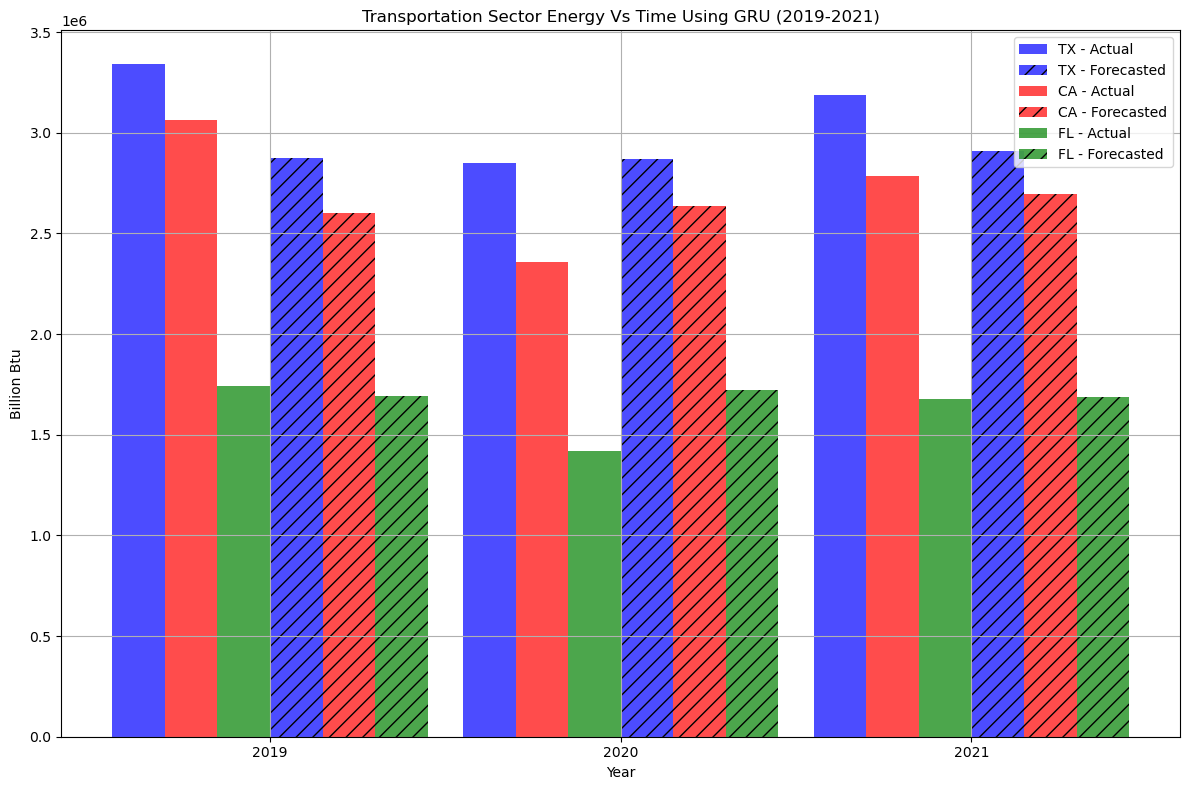

In [14]:
# list of state abbreviations to plot
state_abbreviations =  ['TX','CA','FL']

# Use iloc to get the required years (2019 to 2021) from the end
selected_years = Transportation_T_60.iloc[-3:]
years_forecast = selected_years

# Set the width of the bars
bar_width = 0.15

# Define colors for each state
state_colors = {'TX': 'blue', 'CA': 'red','FL': 'green'}

# Create the bar plot for the actual and forecasted values
plt.figure(figsize=(12, 8))

for i, state in enumerate(state_abbreviations):
    # Calculate the x positions for the bars, introducing an offset for each state
    x_positions_actual = np.arange(len(selected_years.index)) + i * bar_width
    x_positions_forecasted = np.arange(len(years_forecast)) + (len(state_abbreviations) + i) * bar_width

    # Use the color assigned to the state for both actual and forecasted bars
    plt.bar(x_positions_actual, selected_years[state], label=f"{state} - Actual", width=bar_width, color=state_colors[state], alpha=0.7)
    plt.bar(x_positions_forecasted, state_predictions_gru[state].values(), bar_width,
            label=f"{state} - Forecasted", hatch='//', color=state_colors[state], alpha=0.7)
# x-labels
plt.xlabel('Year')
# y-labels 
plt.ylabel('Billion Btu')
# title
plt.title('Transportation Sector Energy Vs Time Using GRU (2019-2021)')
# Add legend
plt.legend()

# Set x-axis ticks and labels
combined_years = np.arange(len(selected_years.index)) + (len(state_abbreviations) - 0.5) * bar_width
plt.xticks(combined_years, selected_years.index)  

# Add grid
plt.grid(True)
plt.tight_layout()
# Show the plot
plt.show()

### CNN

In [15]:
# sequence length and accuracy threshold
sequence_length_cnn = 40
accuracy_threshold_cnn = 0.01  

# Loop through each selected state
state_mse_cnn = {}
state_rmse_cnn = {}
state_forecasts_cnn = {}
state_predictions_cnn = {}  

for state in ['TX','CA','FL']:
    # Extract the data for the selected state
    data = Transportation.loc[state].values

    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))

    # sequences for CNN
    sequences = []
    targets = []
    for i in range(len(scaled_data) - sequence_length_cnn):
        seq = scaled_data[i:i + sequence_length_cnn]
        target = scaled_data[i + sequence_length_cnn]
        sequences.append(seq)
        targets.append(target)
    x_train, y_train = np.array(sequences), np.array(targets)

    # Include data beyond 1969 for training
    x_train_full, y_train_full = x_train[:len(x_train)], y_train[:len(y_train)]

    # train the CNN model
    model_cnn = Sequential()
    model_cnn.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(sequence_length_cnn, 1)))
    model_cnn.add(MaxPooling1D(pool_size=2))
    model_cnn.add(Flatten())
    model_cnn.add(Dense(units=50, activation='relu'))
    model_cnn.add(Dense(units=1))
    model_cnn.compile(optimizer='adam', loss='mean_squared_error')

    # Lists to store forecasts, actual values, and predictions
    forecasts_cnn = []
    actual_values_cnn = []
    predictions_cnn = []

    # Iterate through the forecast years
    current_sequence_cnn = x_train_full[-1]
    for year in range(len(x_train), len(scaled_data)):
        forecast_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
        actual_value_cnn = scaled_data[year]
        x_train_full = np.append(x_train_full, current_sequence_cnn.reshape(1, sequence_length_cnn, 1), axis=0)
        y_train_full = np.append(y_train_full, actual_value_cnn)
        mse_cnn = mean_squared_error([actual_value_cnn], [forecast_cnn[0]])
        model_cnn.fit(x_train_full, y_train_full, epochs=20, batch_size=1)
        current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_cnn[0])

        # If prediction accuracy is below the threshold, retrain and predict again
        if mse_cnn > accuracy_threshold_cnn:
            continue
        else:
            forecasts_cnn.append(forecast_cnn[0])
            actual_values_cnn.append(actual_value_cnn)

            # Store the prediction for the current year
            prediction_cnn = scaler.inverse_transform(forecast_cnn.reshape(-1, 1))[0][0]
            predictions_cnn.append(prediction_cnn)

    # Inverse transform the forecasts and actual values to the original scale
    forecasts_cnn = scaler.inverse_transform(np.array(forecasts_cnn).reshape(-1, 1))
    actual_values_cnn = scaler.inverse_transform(np.array(actual_values_cnn).reshape(-1, 1))

    # Calculate the mean squared error (MSE) for the forecasts
    mse_cnn = mean_squared_error(actual_values_cnn, forecasts_cnn)

    # Calculate the root mean squared error (RMSE)
    rmse_cnn = np.sqrt(mse_cnn)
    state_mse_cnn[state] = mse_cnn
    state_rmse_cnn[state] = rmse_cnn

    # Forecast for 2022 and 2023
    forecast_2022_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2022_cnn[0])
    forecast_2023_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))

    # Inverse transform the forecasts to the original scale
    forecast_2022_cnn = scaler.inverse_transform(forecast_2022_cnn.reshape(-1, 1))[0][0]
    forecast_2023_cnn = scaler.inverse_transform(forecast_2023_cnn.reshape(-1, 1))[0][0]
    state_forecasts_cnn[state] = {'2022': forecast_2022_cnn, '2023': forecast_2023_cnn}

    # Store predictions for 2019
    forecast_2019_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2019_cnn[0])
    # Store predictions for 2020
    forecast_2020_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2020_cnn[0])
    # Store predictions for 2021
    forecast_2021_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2021_cnn[0])
    # Inverse transform the predictions to the original scale for 2019
    prediction_2019_cnn = scaler.inverse_transform(forecast_2019_cnn.reshape(-1, 1))[0][0]
    # Inverse transform the predictions to the original scale for 2020
    prediction_2020_cnn = scaler.inverse_transform(forecast_2020_cnn.reshape(-1, 1))[0][0]
    # Inverse transform the predictions to the original scale for 2021
    prediction_2021_cnn = scaler.inverse_transform(forecast_2021_cnn.reshape(-1, 1))[0][0]
    # store the values for 2019,2020 and 2021
    state_predictions_cnn[state] = {'2019': prediction_2019_cnn, '2020': prediction_2020_cnn, '2021': prediction_2021_cnn}

# Print MSE and RMSE for all states
print("\nMean Squared Error (MSE) for All States:")
for state, mse_value in state_mse_cnn.items():
    print(f"MSE for {state} (CNN): {mse_value:.2f}")

print("\nRoot Mean Squared Error (RMSE) for All States:")
for state, rmse_value in state_rmse_cnn.items():
    print(f"RMSE for {state} (CNN): {rmse_value:.2f}")

# Print forecasts for all states
print("\nForecasts for All States:")
for state, forecasts in state_forecasts_cnn.items():
    print(f"Forecasts for {state} - 2022: {forecasts['2022']:.2f}, 2023: {forecasts['2023']:.2f}")

# Print predictions for 2019, 2020, and 2021 for all states
print("\nPredictions for 2019, 2020, and 2021 for All States:")
for state, predictions in state_predictions_cnn.items():
    print(f"Predictions for {state} - 2019: {predictions['2019']:.2f}, 2020: {predictions['2020']:.2f}, 2021: {predictions['2021']:.2f}")

# Calculate and store accuracy for each state and year for CNN
state_accuracies_cnn = {}

for state in state_predictions_cnn:
    accuracies_state = {'2019': [], '2020': [], '2021': []}
    for year in ['2019', '2020', '2021']:
        actual_value = Transportation.loc[state].loc[int(year)]
        predicted_value = state_predictions_cnn[state][year]
        accuracy = 100 - abs((predicted_value - actual_value) / actual_value) * 100
        accuracies_state[year].append(accuracy)
    state_accuracies_cnn[state] = accuracies_state

# Print accuracies for each state and year for CNN
print("\nAccuracies for Predictions (2019, 2020, 2021) - Individual States (CNN):")
for state, accuracies_state in state_accuracies_cnn.items():
    for year, accuracies in accuracies_state.items():
        average_accuracy = sum(accuracies) / len(accuracies)
        print(f"Average Accuracy for {state} - {year}: {average_accuracy:.2f}%")

1/1 [==============================] - 0s 245ms/step
Epoch 1/20
23/23 [==============================] - 2s 5ms/step - loss: 0.1079
Epoch 2/20
23/23 [==============================] - 0s 6ms/step - loss: 0.0221
Epoch 3/20
23/23 [==============================] - 0s 6ms/step - loss: 0.0209
Epoch 4/20
23/23 [==============================] - 0s 6ms/step - loss: 0.0194
Epoch 5/20
23/23 [==============================] - 0s 6ms/step - loss: 0.0254
Epoch 6/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0227
Epoch 7/20
23/23 [==============================] - 0s 6ms/step - loss: 0.0226
Epoch 8/20
23/23 [==============================] - 0s 6ms/step - loss: 0.0218
Epoch 9/20
23/23 [==============================] - 0s 6ms/step - loss: 0.0192
Epoch 10/20
23/23 [==============================] - 0s 6ms/step - loss: 0.0217
Epoch 11/20
23/23 [==============================] - 0s 6ms/step - loss: 0.0190
Epoch 12/20
23/23 [==============================] - 0s 7ms/step - loss: 0.0

32/32 [==============================] - 0s 4ms/step - loss: 0.0073
Epoch 20/20
1/1 [==============================] - 0s 41ms/step
Epoch 1/20
33/33 [==============================] - 0s 4ms/step - loss: 0.0057
Epoch 2/20
33/33 [==============================] - 0s 4ms/step - loss: 0.0055
Epoch 3/20
33/33 [==============================] - 0s 4ms/step - loss: 0.0057
Epoch 4/20
33/33 [==============================] - 0s 5ms/step - loss: 0.0054
Epoch 5/20
33/33 [==============================] - 0s 4ms/step - loss: 0.0058
Epoch 6/20
33/33 [==============================] - 0s 4ms/step - loss: 0.0060
Epoch 7/20
33/33 [==============================] - 0s 4ms/step - loss: 0.0067
Epoch 8/20
33/33 [==============================] - 0s 4ms/step - loss: 0.0079
Epoch 9/20
33/33 [==============================] - 0s 5ms/step - loss: 0.0062
Epoch 10/20
33/33 [==============================] - 0s 4ms/step - loss: 0.0056
Epoch 11/20
33/33 [==============================] - 0s 3ms/step - loss: 0.00

42/42 [==============================] - 0s 3ms/step - loss: 0.0044
Epoch 18/20
42/42 [==============================] - 0s 4ms/step - loss: 0.0043
Epoch 19/20
42/42 [==============================] - 0s 4ms/step - loss: 0.0043
Epoch 20/20
1/1 [==============================] - 0s 37ms/step
Epoch 1/20
43/43 [==============================] - 0s 4ms/step - loss: 0.0040
Epoch 2/20
43/43 [==============================] - 0s 3ms/step - loss: 0.0044
Epoch 3/20
43/43 [==============================] - 0s 4ms/step - loss: 0.0042
Epoch 4/20
43/43 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 5/20
43/43 [==============================] - 0s 4ms/step - loss: 0.0046
Epoch 6/20
43/43 [==============================] - 0s 4ms/step - loss: 0.0046
Epoch 7/20
43/43 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 8/20
43/43 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 9/20
43/43 [==============================] - 0s 4ms/step - loss: 0.00

52/52 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 16/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 17/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 18/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 19/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 20/20
1/1 [==============================] - 0s 37ms/step
Epoch 1/20
53/53 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 2/20
53/53 [==============================] - 0s 4ms/step - loss: 0.0031
Epoch 3/20
53/53 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 4/20
53/53 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 5/20
53/53 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 6/20
53/53 [==============================] - 0s 4ms/step - loss: 0.0029
Epoch 7/20
53/53 [==============================] - 0s 3ms/step - loss: 0.

62/62 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 14/20
62/62 [==============================] - 0s 4ms/step - loss: 0.0026
Epoch 15/20
62/62 [==============================] - 0s 4ms/step - loss: 0.0026
Epoch 16/20
62/62 [==============================] - 0s 4ms/step - loss: 0.0026
Epoch 17/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 18/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 19/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 20/20
1/1 [==============================] - 0s 141ms/step
Epoch 1/20
23/23 [==============================] - 1s 4ms/step - loss: 0.1591
Epoch 2/20
23/23 [==============================] - 0s 4ms/step - loss: 0.0785
Epoch 3/20
23/23 [==============================] - 0s 4ms/step - loss: 0.0461
Epoch 4/20
23/23 [==============================] - 0s 4ms/step - loss: 0.0292
Epoch 5/20
23/23 [==============================] - 0s 4ms/step - loss:

32/32 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 9/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 10/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0024
Epoch 11/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0024
Epoch 12/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0026
Epoch 13/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0025
Epoch 14/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0024
Epoch 15/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0021
Epoch 16/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 17/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 18/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0020
Epoch 19/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 20/20
1/1 [==============================] - 0s

42/42 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 7/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 8/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 9/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 10/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 11/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 12/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 13/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 14/20
42/42 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 15/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 16/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 17/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 18/20
42/42 [==============================] - 0s

52/52 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 4/20
52/52 [==============================] - 0s 4ms/step - loss: 0.0030
Epoch 5/20
52/52 [==============================] - 0s 4ms/step - loss: 0.0016
Epoch 6/20
52/52 [==============================] - 0s 5ms/step - loss: 0.0013
Epoch 7/20
52/52 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 8/20
52/52 [==============================] - 0s 5ms/step - loss: 0.0012
Epoch 9/20
52/52 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 10/20
52/52 [==============================] - 0s 5ms/step - loss: 0.0014
Epoch 11/20
52/52 [==============================] - 0s 4ms/step - loss: 0.0011
Epoch 12/20
52/52 [==============================] - 0s 5ms/step - loss: 0.0012
Epoch 13/20
52/52 [==============================] - 0s 5ms/step - loss: 0.0012
Epoch 14/20
52/52 [==============================] - 0s 6ms/step - loss: 0.0014
Epoch 15/20
52/52 [==============================] - 0s 5m

61/61 [==============================] - 0s 6ms/step - loss: 8.5683e-04
Epoch 19/20
61/61 [==============================] - 0s 5ms/step - loss: 7.9485e-04
Epoch 20/20
1/1 [==============================] - 0s 75ms/step
Epoch 1/20
62/62 [==============================] - 0s 5ms/step - loss: 0.0010
Epoch 2/20
62/62 [==============================] - 0s 5ms/step - loss: 9.2774e-04
Epoch 3/20
62/62 [==============================] - 0s 4ms/step - loss: 9.8654e-04
Epoch 4/20
62/62 [==============================] - 0s 5ms/step - loss: 0.0010
Epoch 5/20
62/62 [==============================] - 0s 4ms/step - loss: 8.6642e-04
Epoch 6/20
62/62 [==============================] - 0s 5ms/step - loss: 7.6541e-04
Epoch 7/20
62/62 [==============================] - 0s 4ms/step - loss: 8.7187e-04
Epoch 8/20
62/62 [==============================] - 0s 5ms/step - loss: 8.1701e-04
Epoch 9/20
62/62 [==============================] - 0s 6ms/step - loss: 8.6730e-04
Epoch 10/20
62/62 [======================

31/31 [==============================] - 0s 4ms/step - loss: 0.0069
Epoch 13/20
31/31 [==============================] - 0s 4ms/step - loss: 0.0068
Epoch 14/20
31/31 [==============================] - 0s 7ms/step - loss: 0.0069
Epoch 15/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0059
Epoch 16/20
31/31 [==============================] - 0s 4ms/step - loss: 0.0059
Epoch 17/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0066
Epoch 18/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0064
Epoch 19/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0081
Epoch 20/20
1/1 [==============================] - 0s 41ms/step
Epoch 1/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0071
Epoch 2/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0069
Epoch 3/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0069
Epoch 4/20
32/32 [==============================] - 0s 3ms/step - loss:

41/41 [==============================] - 0s 4ms/step - loss: 0.0049
Epoch 11/20
41/41 [==============================] - 0s 4ms/step - loss: 0.0052
Epoch 12/20
41/41 [==============================] - 0s 4ms/step - loss: 0.0050
Epoch 13/20
41/41 [==============================] - 0s 6ms/step - loss: 0.0054
Epoch 14/20
41/41 [==============================] - 0s 4ms/step - loss: 0.0048
Epoch 15/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 16/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 17/20
41/41 [==============================] - 0s 6ms/step - loss: 0.0048
Epoch 18/20
41/41 [==============================] - 0s 4ms/step - loss: 0.0046
Epoch 19/20
41/41 [==============================] - 0s 5ms/step - loss: 0.0046
Epoch 20/20
1/1 [==============================] - 0s 33ms/step
Epoch 1/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0058
Epoch 2/20
42/42 [==============================] - 0s 3ms/step - los

51/51 [==============================] - 0s 4ms/step - loss: 0.0034
Epoch 9/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 10/20
51/51 [==============================] - 0s 4ms/step - loss: 0.0036
Epoch 11/20
51/51 [==============================] - 0s 6ms/step - loss: 0.0031
Epoch 12/20
51/51 [==============================] - 0s 6ms/step - loss: 0.0034
Epoch 13/20
51/51 [==============================] - 0s 7ms/step - loss: 0.0032
Epoch 14/20
51/51 [==============================] - 0s 6ms/step - loss: 0.0033
Epoch 15/20
51/51 [==============================] - 0s 6ms/step - loss: 0.0038
Epoch 16/20
51/51 [==============================] - 0s 7ms/step - loss: 0.0036
Epoch 17/20
51/51 [==============================] - 0s 8ms/step - loss: 0.0036
Epoch 18/20
51/51 [==============================] - 0s 7ms/step - loss: 0.0036
Epoch 19/20
51/51 [==============================] - 0s 6ms/step - loss: 0.0035
Epoch 20/20
1/1 [==============================] - 0s

61/61 [==============================] - 0s 8ms/step - loss: 0.0036
Epoch 7/20
61/61 [==============================] - 0s 7ms/step - loss: 0.0030
Epoch 8/20
61/61 [==============================] - 0s 7ms/step - loss: 0.0027
Epoch 9/20
61/61 [==============================] - 0s 7ms/step - loss: 0.0027
Epoch 10/20
61/61 [==============================] - 0s 6ms/step - loss: 0.0028
Epoch 11/20
61/61 [==============================] - 0s 5ms/step - loss: 0.0028
Epoch 12/20
61/61 [==============================] - 0s 7ms/step - loss: 0.0030
Epoch 13/20
61/61 [==============================] - 0s 7ms/step - loss: 0.0027
Epoch 14/20
61/61 [==============================] - 0s 6ms/step - loss: 0.0026
Epoch 15/20
61/61 [==============================] - 0s 7ms/step - loss: 0.0027
Epoch 16/20
61/61 [==============================] - 1s 6ms/step - loss: 0.0027
Epoch 17/20
61/61 [==============================] - 0s 7ms/step - loss: 0.0031
Epoch 18/20
61/61 [==============================] - 1s

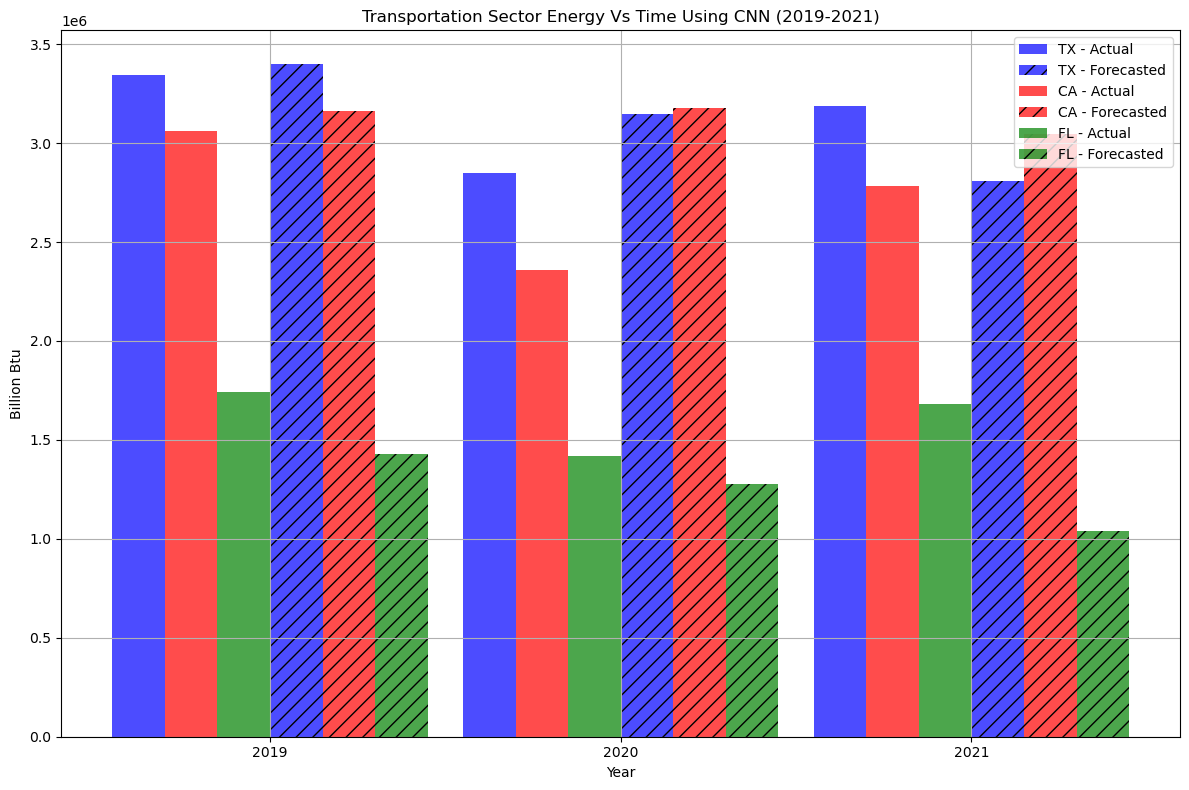

In [16]:
# list of state abbreviations to plot
state_abbreviations =  ['TX','CA','FL']

# Use iloc to get the required years (2019 to 2021) from the end
selected_years = Transportation_T_60.iloc[-3:]
years_forecast = selected_years

# width of the bars
bar_width = 0.15

# colors for each state
state_colors = {'TX': 'blue', 'CA': 'red','FL': 'green'}

# Create the bar plot for the actual and forecasted values
plt.figure(figsize=(12, 8))

for i, state in enumerate(state_abbreviations):
    # Calculate the x positions for the bars, introducing an offset for each state
    x_positions_actual = np.arange(len(selected_years.index)) + i * bar_width
    x_positions_forecasted = np.arange(len(years_forecast)) + (len(state_abbreviations) + i) * bar_width

    # Use the color assigned to the state for both actual and forecasted bars
    plt.bar(x_positions_actual, selected_years[state], label=f"{state} - Actual", width=bar_width, color=state_colors[state], alpha=0.7)
    plt.bar(x_positions_forecasted, state_predictions_cnn[state].values(), bar_width,
            label=f"{state} - Forecasted", hatch='//', color=state_colors[state], alpha=0.7)
# x-labels
plt.xlabel('Year')
# y-labels 
plt.ylabel('Billion Btu')
# title
plt.title('Transportation Sector Energy Vs Time Using CNN (2019-2021)')
# Add legend
plt.legend()

# Set x-axis ticks and labels
combined_years = np.arange(len(selected_years.index)) + (len(state_abbreviations) - 0.5) * bar_width
plt.xticks(combined_years, selected_years.index)  

# Add grid
plt.grid(True)
plt.tight_layout()
# Show the plot
plt.show()

## Machine Learning Forecasting 

### ARIMA

In [4]:
# Function to perform ARIMA forecast
def arima_forecast(state_data, state_name, order=(5, 1, 0), forecast_steps=2):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(state_data.reshape(-1, 1))
    
    train_size = int(len(scaled_data) * 0.8)
    train, test = scaled_data[:train_size], scaled_data[train_size:]
    
    model = ARIMA(train, order=order)
    fit_model = model.fit()
    
    forecast_values_arima = fit_model.forecast(steps=len(scaled_data) - train_size + forecast_steps)
    forecast_values_arima = scaler.inverse_transform(forecast_values_arima.reshape(-1, 1))
    
    mse_arima = mean_squared_error(state_data[train_size:], forecast_values_arima[:len(state_data) - train_size])
    rmse_arima = np.sqrt(mse_arima)
    
    forecast_years_arima = forecast_values_arima[:len(state_data)]
    
    return mse_arima, rmse_arima, forecast_years_arima

# Selected states
selected_states = ['TX','CA','FL']

# Dictionaries to store results
mse_arima_dict = {}
rmse_arima_dict = {}
forecast_years_arima_dict = {}
accuracy_arima_dict = {}

# Loop through each selected state for ARIMA
for state in selected_states:
    state_data = Transportation.loc[state].values
    mse_arima, rmse_arima, forecast_years_arima = arima_forecast(state_data, state, order=(5, 1, 0), forecast_steps=2)
    
    mse_arima_dict[state] = mse_arima
    rmse_arima_dict[state] = rmse_arima
    forecast_years_arima_dict[state] = forecast_years_arima
    
    # Calculate accuracy for each year
    actual_data = state_data[-3:]
    forecasted_data = forecast_years_arima[:3]
    
    accuracies = 100 - np.abs((forecasted_data - actual_data) / actual_data) * 100
    
    accuracy_arima_dict[state] = {
        '2019': accuracies[0][0],
        '2020': accuracies[1][0],
        '2021': accuracies[2][0]
    }
    
    # Print the values for each year
    print(f"\n{state} - Actual Values:")
    print(f"2019: {actual_data[0]:.2f}, 2020: {actual_data[1]:.2f}, 2021: {actual_data[2]:.2f}")

    print(f"{state} - Forecasted Values:")
    print(f"2019: {forecasted_data[0][0]:.2f}, 2020: {forecasted_data[1][0]:.2f}, 2021: {forecasted_data[2][0]:.2f}")

    # Print forecast values for 2022 and 2023
    print(f"{state} - Forecasted Values for 2022 and 2023:")
    for year, forecast_value in zip(range(2022, 2024), forecast_years_arima[3:]):
        print(f"{year}: {forecast_value[0]:.2f}")

    # Print the accuracy for each year
    print(f"Accuracy for {state} (ARIMA) - 2019: {accuracy_arima_dict[state]['2019']:.2f}%")
    print(f"Accuracy for {state} (ARIMA) - 2020: {accuracy_arima_dict[state]['2020']:.2f}%")
    print(f"Accuracy for {state} (ARIMA) - 2021: {accuracy_arima_dict[state]['2021']:.2f}")
    print(f"Mean Squared Error (MSE) for {state} (ARIMA): {mse_arima:.2f}")
    print(f"Root Mean Squared Error (RMSE) for {state} (ARIMA): {rmse_arima:.2f}\n")
# Print the forecasted values for 2022 and 2023 for all states
print("\nForecasted Values for 2022 and 2023 (ARIMA):")
for year in range(2022, 2024):
    print(f"Forecasts for {year}:")
    for state in selected_states:
        forecast_value = forecast_years_arima_dict[state][year - 2019][0]
        print(f"{state}: {forecast_value:.2f}")

# Print MSE for all states
print("\nMean Squared Error (MSE) for All states:")
for state, mse_value in mse_arima_dict.items():
    print(f"MSE for {state} (ARIMA): {mse_value:.2f}")

# Print RMSE for all states
print("\nRoot Mean Squared Error (RMSE) for All states:")
for state, rmse_value in rmse_arima_dict.items():
    print(f"RMSE for {state} (ARIMA): {rmse_value:.2f}")



TX - Actual Values:
2019: 3341914.00, 2020: 2850267.00, 2021: 3188982.00
TX - Forecasted Values:
2019: 2786439.42, 2020: 2841775.61, 2021: 2892336.05
TX - Forecasted Values for 2022 and 2023:
2022: 2869496.93
2023: 2845541.78
Accuracy for TX (ARIMA) - 2019: 83.38%
Accuracy for TX (ARIMA) - 2020: 85.03%
Accuracy for TX (ARIMA) - 2021: 86.55
Mean Squared Error (MSE) for TX (ARIMA): 47996579237.97
Root Mean Squared Error (RMSE) for TX (ARIMA): 219081.22


CA - Actual Values:
2019: 3061340.00, 2020: 2356354.00, 2021: 2785096.00
CA - Forecasted Values:
2019: 3123996.43, 2020: 3055875.25, 2021: 3099475.77
CA - Forecasted Values for 2022 and 2023:
2022: 3122705.46
2023: 3105588.88
Accuracy for CA (ARIMA) - 2019: 97.95%
Accuracy for CA (ARIMA) - 2020: 99.82%
Accuracy for CA (ARIMA) - 2021: 98.75
Mean Squared Error (MSE) for CA (ARIMA): 79787993313.68
Root Mean Squared Error (RMSE) for CA (ARIMA): 282467.69


FL - Actual Values:
2019: 1744439.00, 2020: 1418685.00, 2021: 1679305.00
FL - Forecas

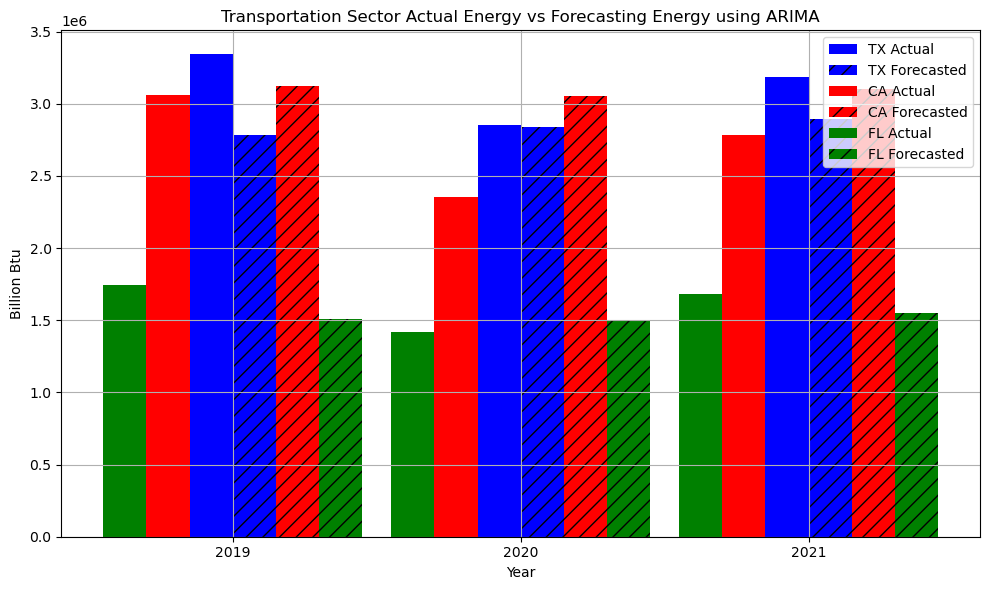

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Define colors for each state
state_colors = {'TX': 'blue', 'CA': 'red','FL': 'green'}

# Create a figure
plt.figure(figsize=(10, 6))

# Define the width of the bars and the space between bar groups
bar_width = 0.15
space = np.arange(len(range(2019, 2022)))

# Loop through each selected state
for i, state in enumerate(selected_states):
    # Extract actual and forecasted data
    actual_data = Transportation.loc[state].values[-3:]
    forecasted_data = np.array(forecast_years_arima_dict[state][:3]).flatten() 

    # Generate x values (years)
    years = range(2019, 2022)

    # Plot actual data with custom color on the left side
    plt.bar(space - bar_width/2 - i*bar_width, actual_data, bar_width, label=f'{state} Actual', color=state_colors[state])

    # Plot forecasted data with hatch pattern and custom color on the right side
    plt.bar(space + bar_width/2 + i*bar_width, forecasted_data, bar_width, label=f'{state} Forecasted', color=state_colors[state], hatch='//')

# x-labels
plt.xlabel('Year')
# y-labels 
plt.ylabel('Billion Btu')
# title
plt.title('Transportation Sector Actual Energy vs Forecasting Energy using ARIMA')

# Add xticks
plt.xticks(space, years)

# Add a legend
plt.legend()

# Add grid
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
